<center><h1 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;">House Price Prediction 🏡</h1></center>

<center><img src="https://images.unsplash.com/photo-1516156008625-3a9d6067fab5?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80"></center>

# تضمين مكاتب اللازمة

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
import joblib

## الخطوة الأولى : استكشاف وتحليل البيانات


In [29]:
df = pd.read_csv("train_colleage.csv")

### تحميل البيانات وطباعة أول خمسة أسطر

In [30]:
df.head()

,Id,BuildingCategory,ZoningClassification,StreetLineLength,ParcelSize,RoadAccessType,AlleyAccessType,ParcelShape,TerrainFlatness,UtilityAvailability,...,PoolSize,PoolQuality,FenceQuality,AdditionalFeature,AdditionalFeatureValue,SaleMonth,SaleYear,SaleType,SaleCondition,OutcomeVariable
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- البيانات تحتوي على 81 عمودًا
- يمثل كل عمود ميزة مختلفة للمتغيرات مع العمود الأخير (OutcomeVariable) الذي يمثل المتغير الهدف الذي نسعى للتنبؤ به.

In [31]:
df.shape

(1460, 81)

- التعرف على أنواع الأعمدة وعدد القيم غير الخالية الموجودة في تلك الأعمدة 

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      1460 non-null   int64  
 1   BuildingCategory        1460 non-null   int64  
 2   ZoningClassification    1460 non-null   object 
 3   StreetLineLength        1201 non-null   float64
 4   ParcelSize              1460 non-null   int64  
 5   RoadAccessType          1460 non-null   object 
 6   AlleyAccessType         91 non-null     object 
 7   ParcelShape             1460 non-null   object 
 8   TerrainFlatness         1460 non-null   object 
 9   UtilityAvailability     1460 non-null   object 
 10  ParcelSettings          1460 non-null   object 
 11  TerrainSlope            1460 non-null   object 
 12  District                1460 non-null   object 
 13  RoadProximity1          1460 non-null   object 
 14  RoadProximity2          1460 non-null   

***الملخص الإحصائي لمجموعة البيانات***

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
BuildingCategory,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
StreetLineLength,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
ParcelSize,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
MaterialQuality,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
ConditionRating,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
ConstructionYear,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
RenovationYear,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasonrySize,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BasementFinishedArea1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


- معرفة الارتباط بين فيتشرز 

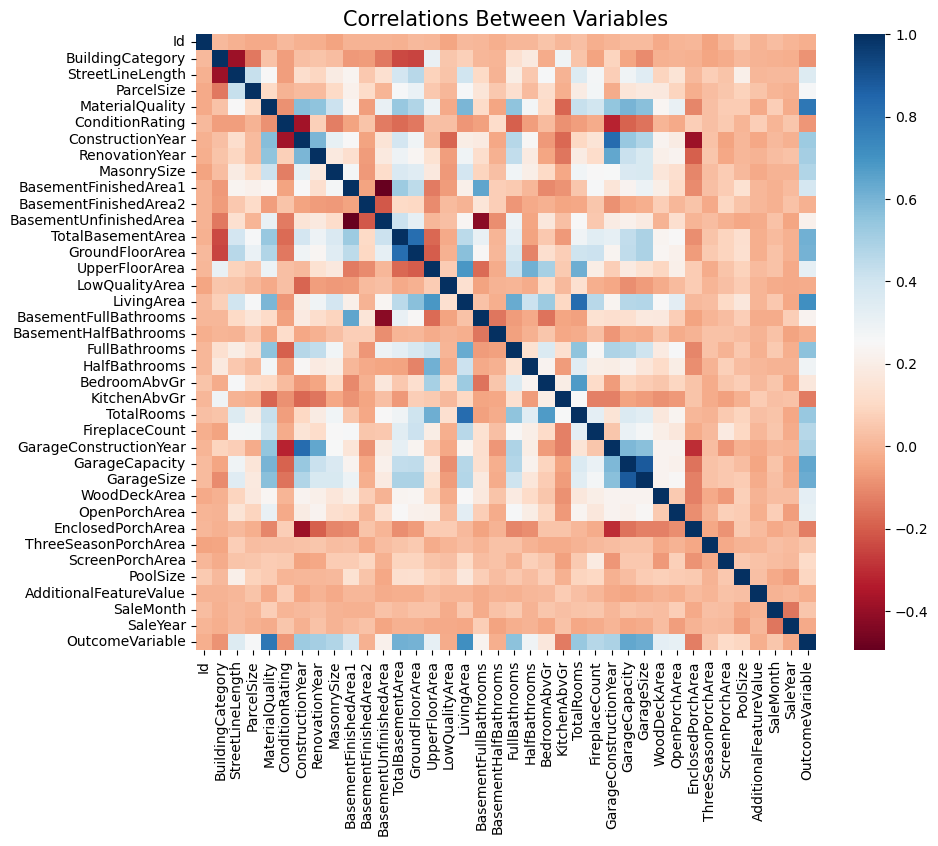

In [34]:
numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10,8))
sns.heatmap(numerical_df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

- معرفة مدى توزع سعر

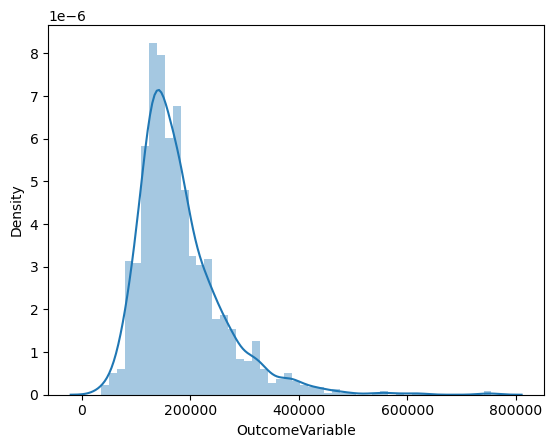

In [35]:
sns.distplot(df['OutcomeVariable'])

 من مقياس الالتواء نستنتج:
 قيمة الالتواء تشير الى قيمة موجبة تعني أن هناك ذيل يميني أكبر من الذيل اليساري بمعنى وجود قيم عالية بعيدة بشكل غير عادي واكبرمن المتوسط متجهة نحو اليمين بمعنى هناك أسعار غير عادية للعقارات

 من مقياس التفلطح نستنتج أن القيمة موجبة وهذا يدل على وجود قيم حادة وذيول طويلة واكثر كثافة مقارنة بالتوزع الطبيعي الذي عادة ما يكون قيمته 3

In [36]:
# حساب الالتواء والتفلطح
print("Skewness: %f" % df['OutcomeVariable'].skew())
print("Kurtosis: %f" % df['OutcomeVariable'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


## اختيار فيتشرز مهمة

معرفة نسبة قيمة فاضية ضمن كل عامود 

In [37]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/ df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
PoolQuality,1453,0.995205
AdditionalFeature,1406,0.963014
AlleyAccessType,1369,0.937671
FenceQuality,1179,0.807534
MasonryType,872,0.597260
FireplaceQuality,690,0.472603
StreetLineLength,259,0.177397
GarageConstructionYear,81,0.055479
GarageCondition,81,0.055479
GarageLocation,81,0.055479


حذف كل عامود يحودي على اكثر من 500 قيمة فاضية

In [38]:
df_clean = df.drop((missing_data[missing_data['Total'] >= 500]).index, axis=1)

فحص  اذا هناك عواميد اخرى تحوي قيم فاضية

In [39]:
print("Missing Values by Column")
print("-"*30)
print(df_clean.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df_clean.isna().sum().sort_values(ascending=False))

Missing Values by Column
------------------------------
Id                        0
BuildingCategory          0
ZoningClassification      0
StreetLineLength        259
ParcelSize                0
                       ... 
SaleMonth                 0
SaleYear                  0
SaleType                  0
SaleCondition             0
OutcomeVariable           0
Length: 75, dtype: int64
------------------------------
TOTAL MISSING VALUES: StreetLineLength          259
GarageConstructionYear     81
GarageCondition            81
GarageLocation             81
GarageInterior             81
                         ... 
BasementUnfinishedArea      0
TotalBasementArea           0
BuildingCategory            0
HeatingQuality              0
OutcomeVariable             0
Length: 75, dtype: int64


# **استكشاف الداتا عن طريق رسم**

In [40]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

- Histograms

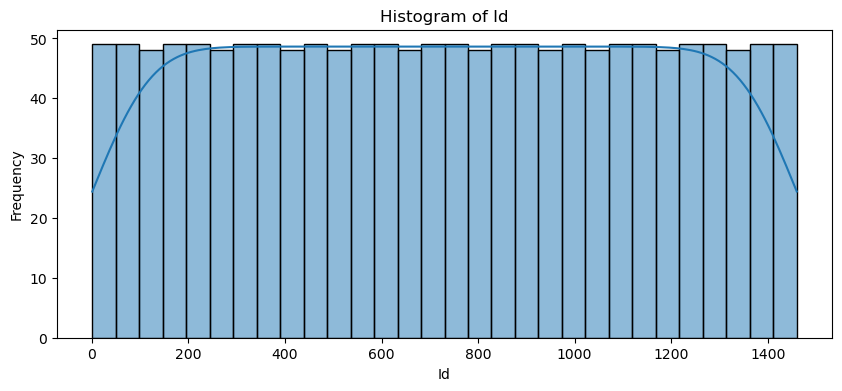

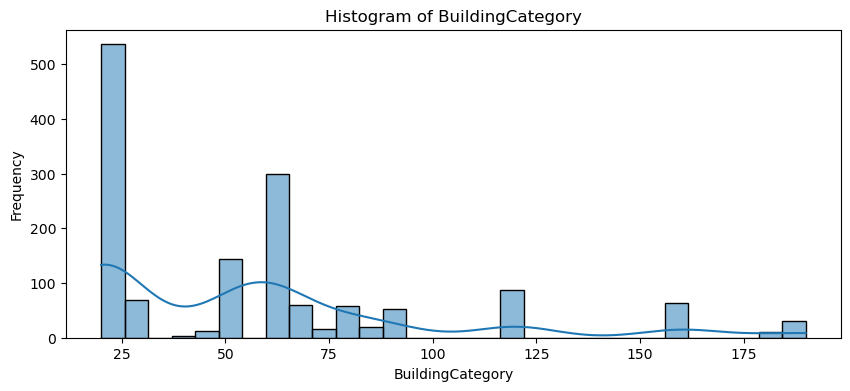

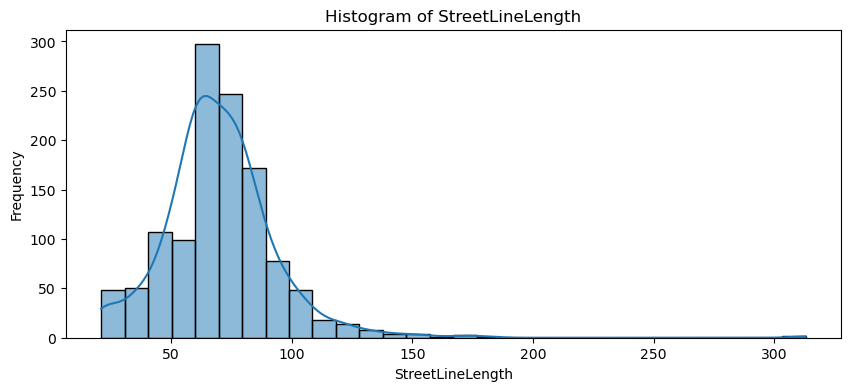

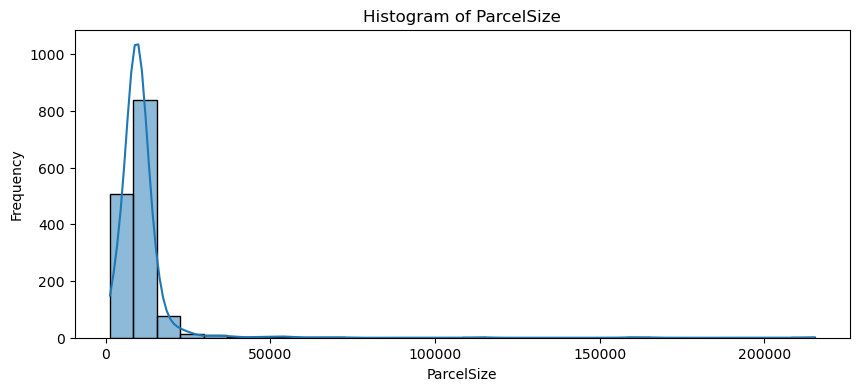

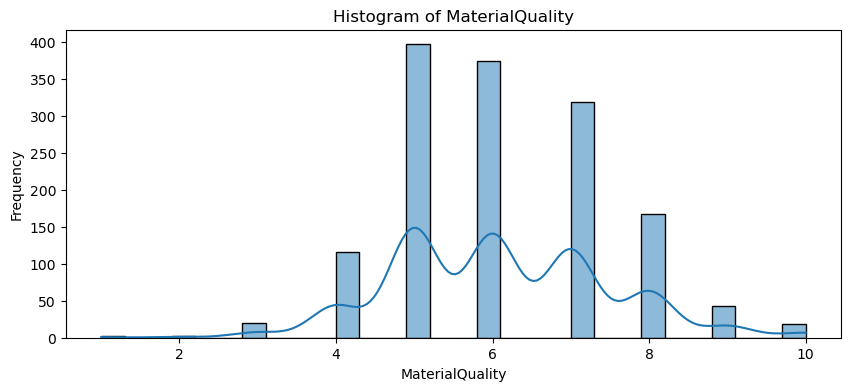

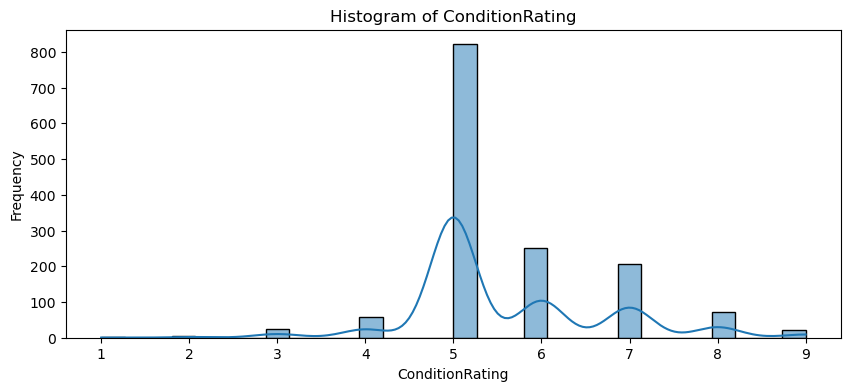

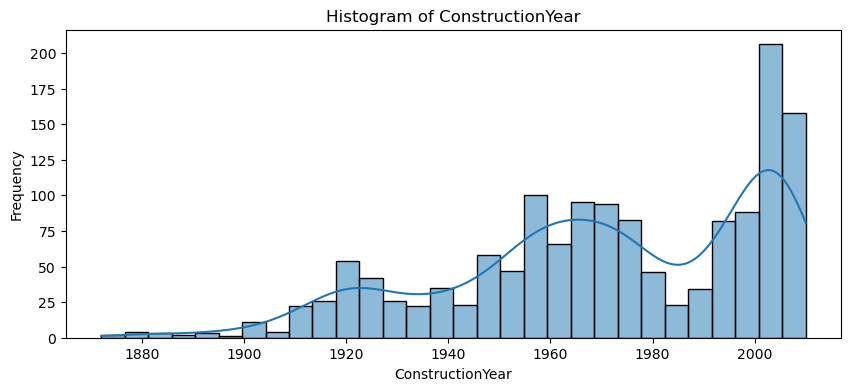

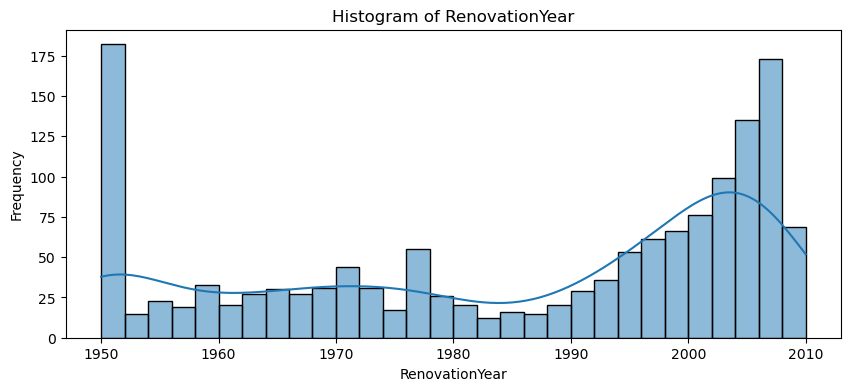

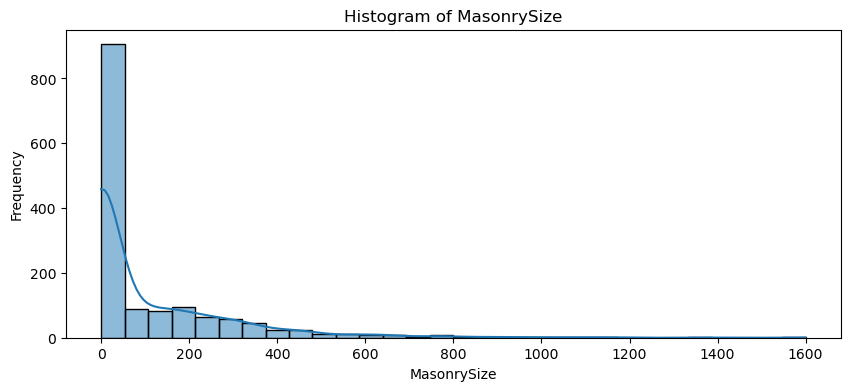

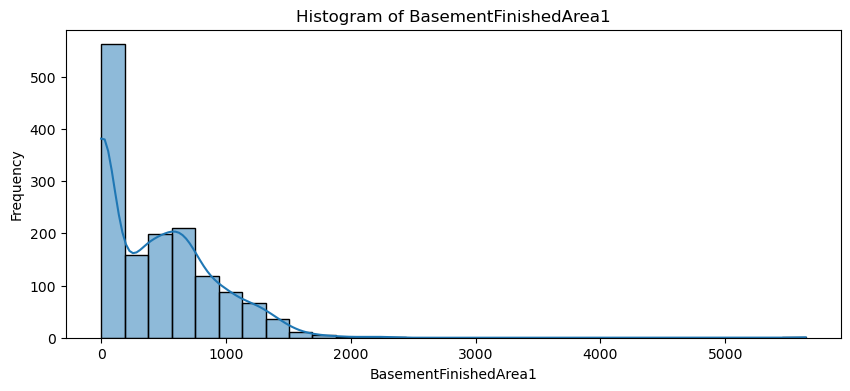

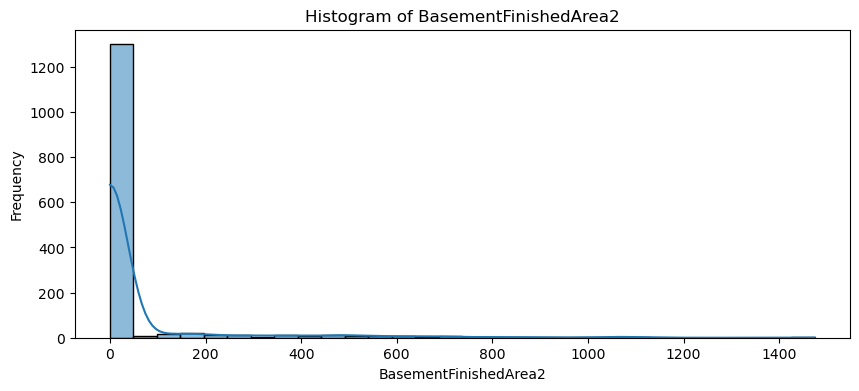

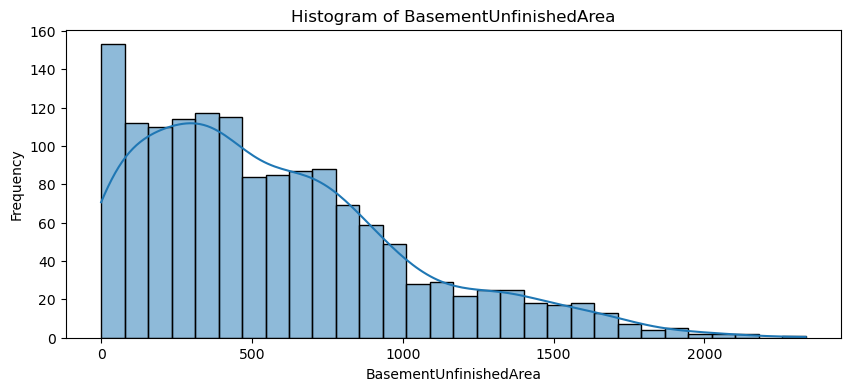

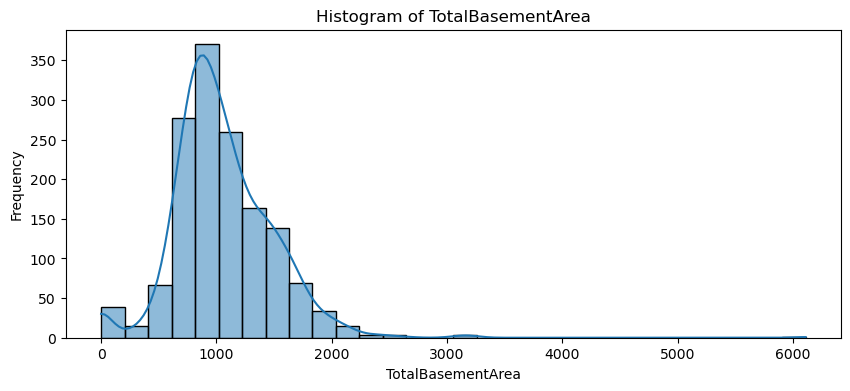

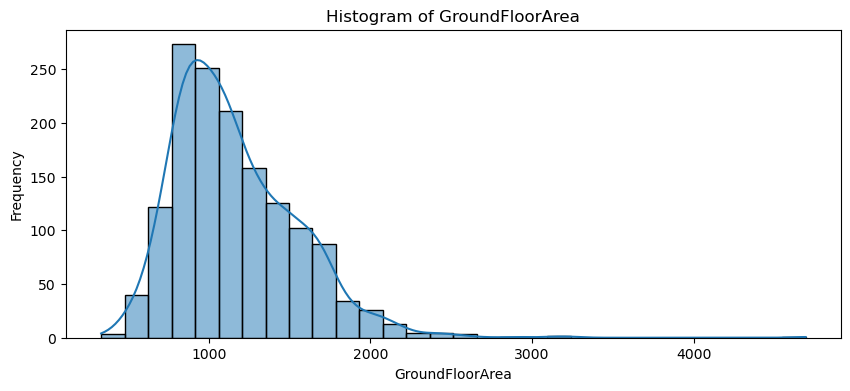

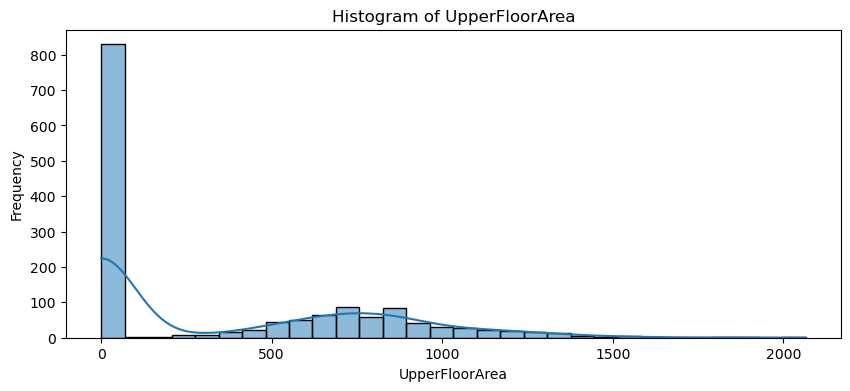

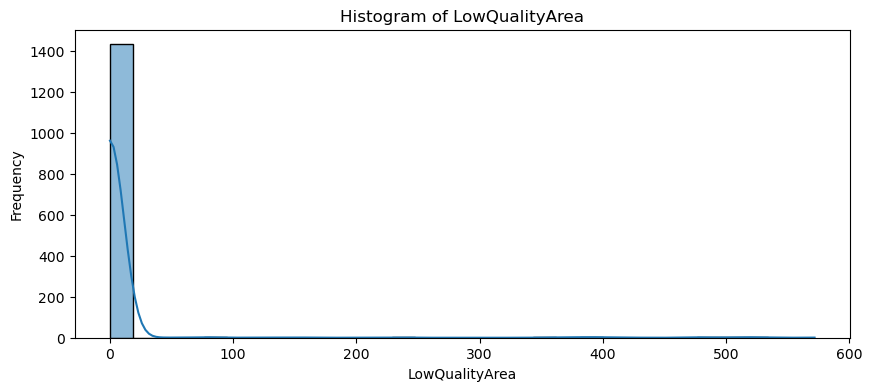

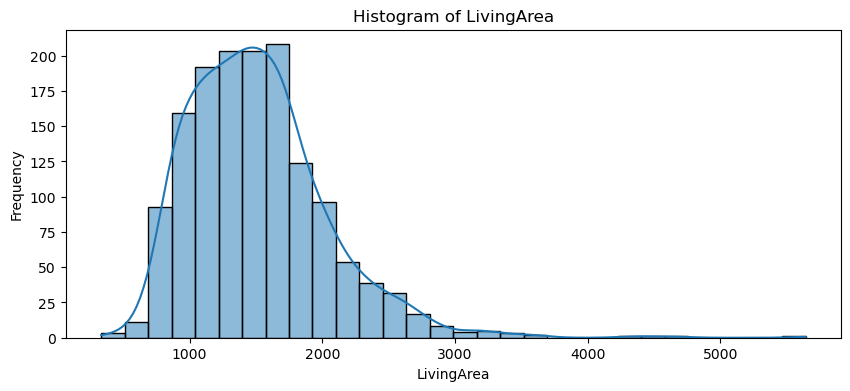

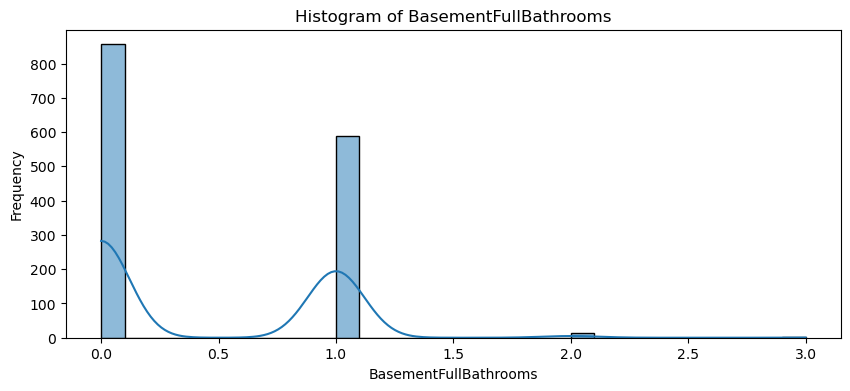

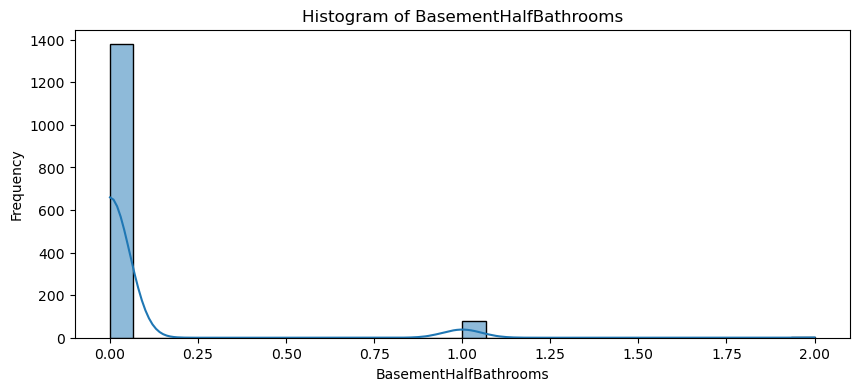

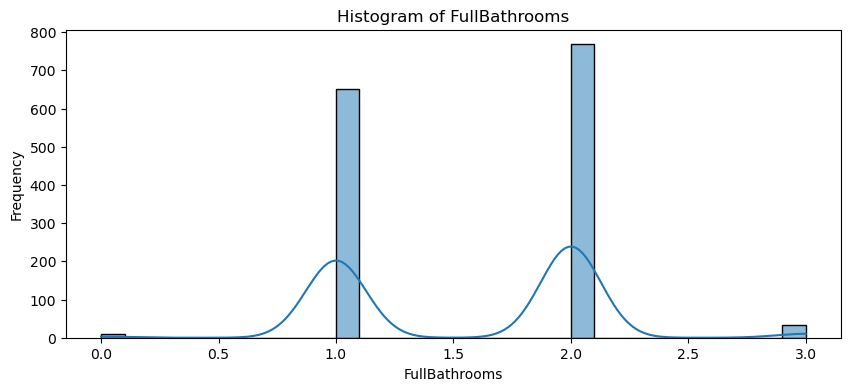

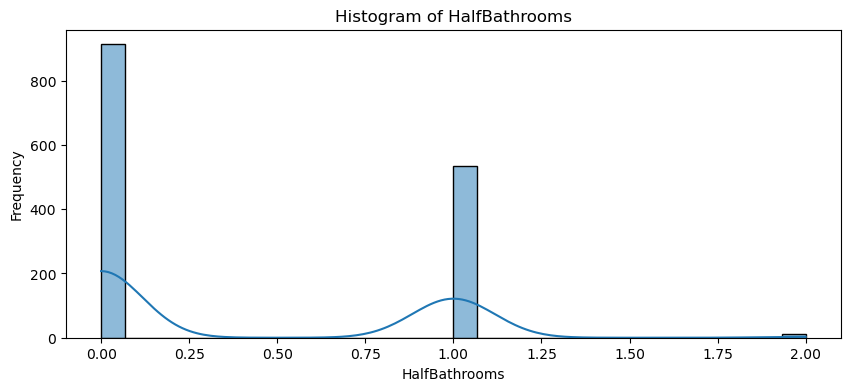

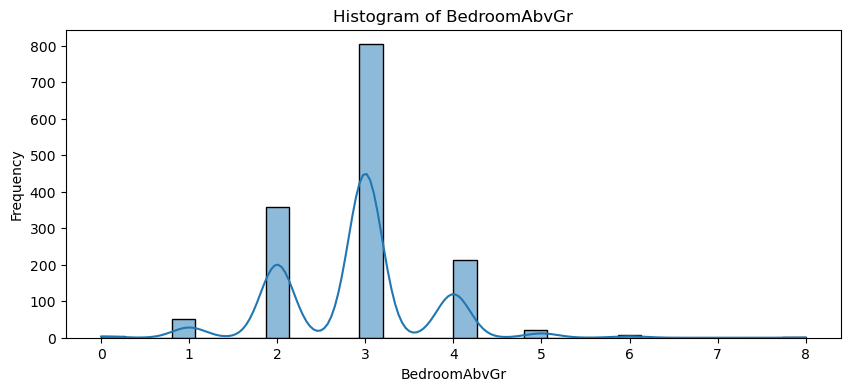

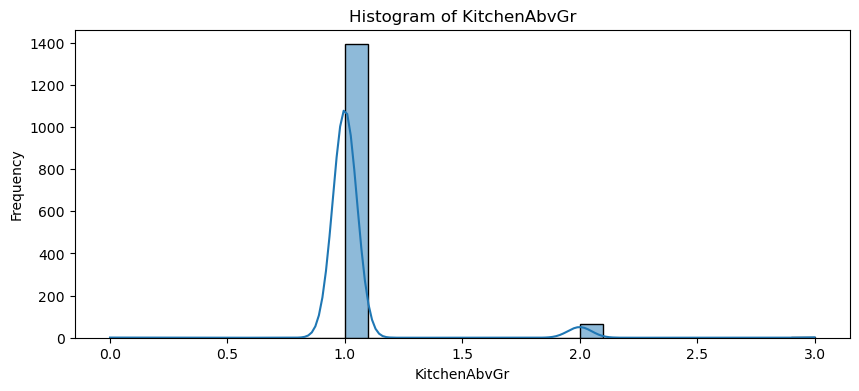

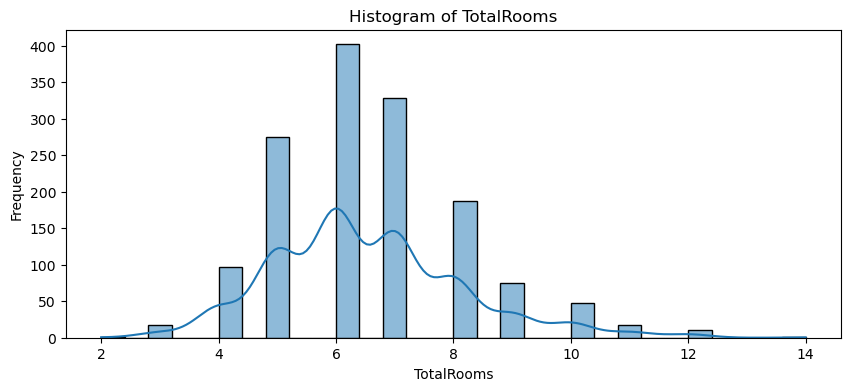

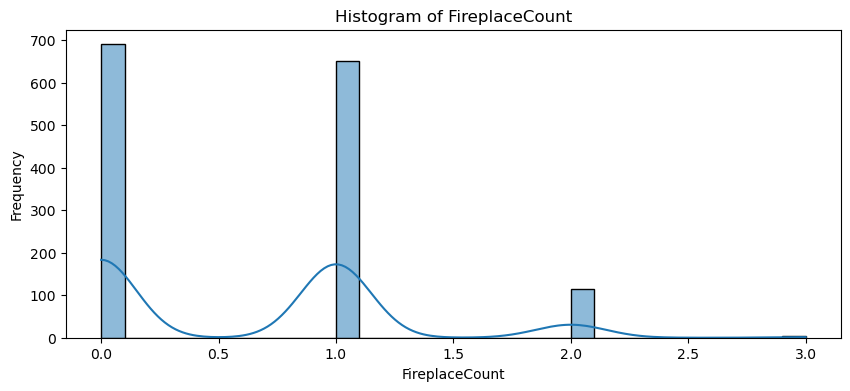

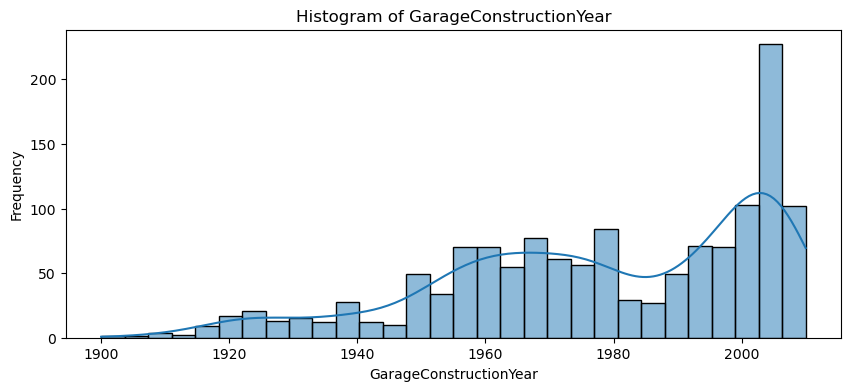

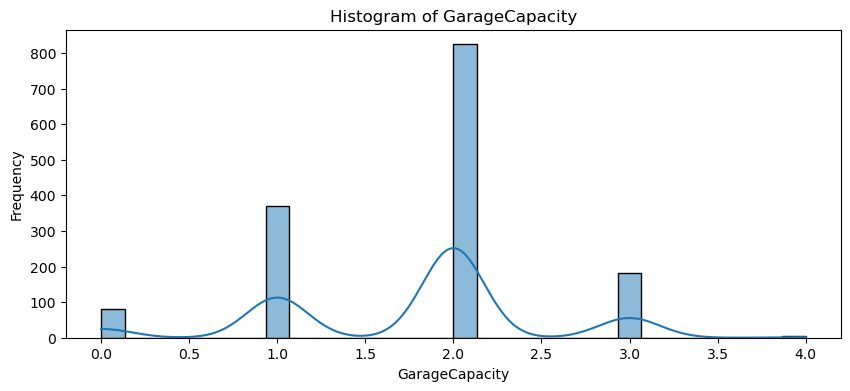

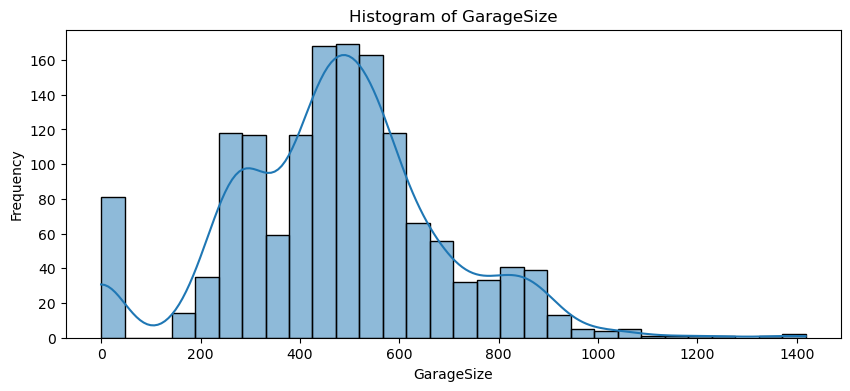

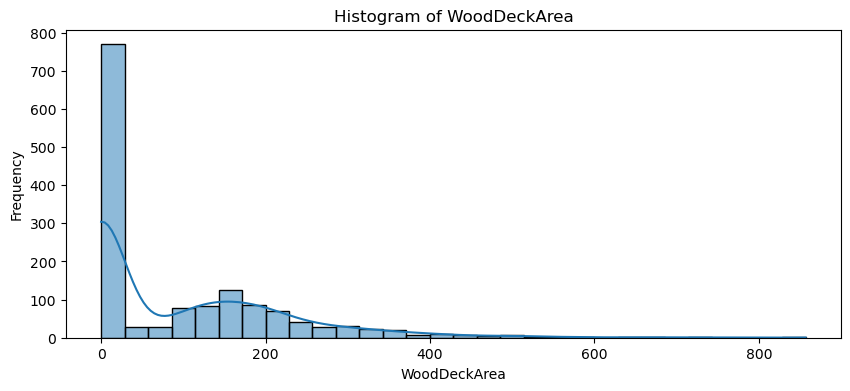

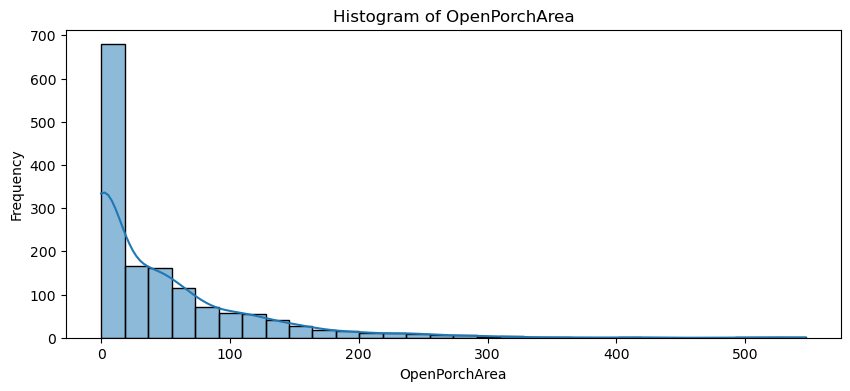

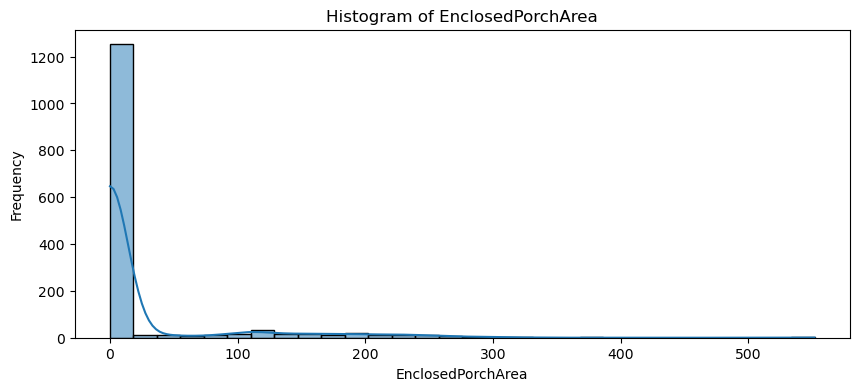

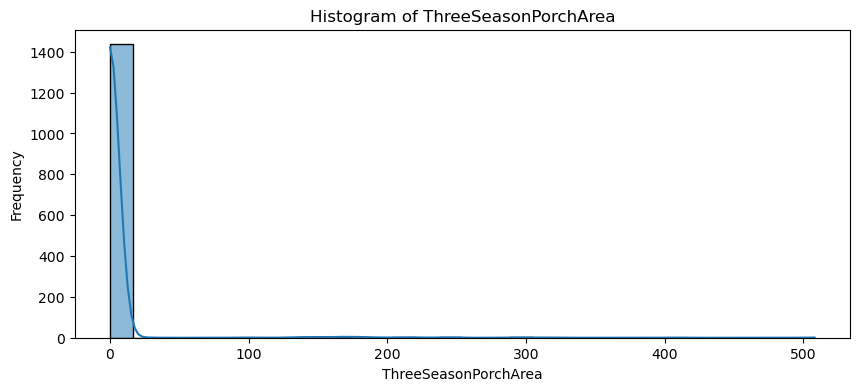

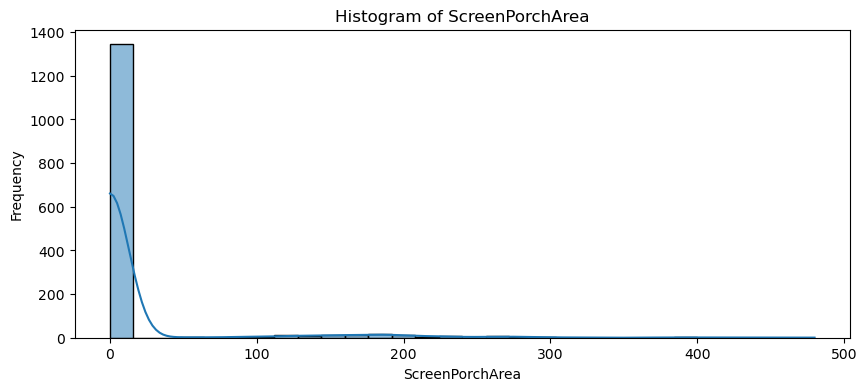

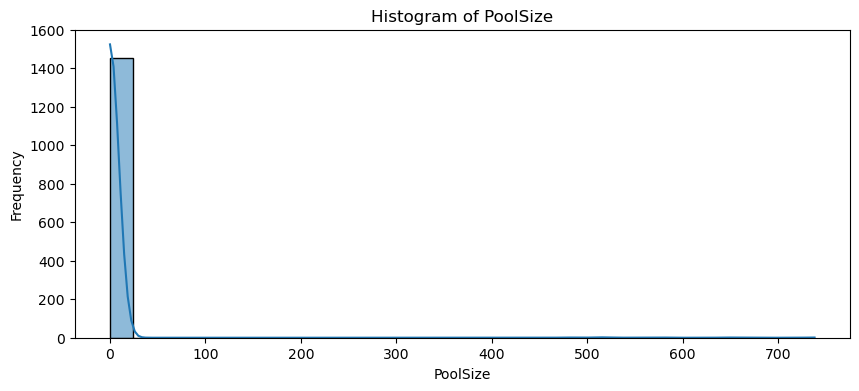

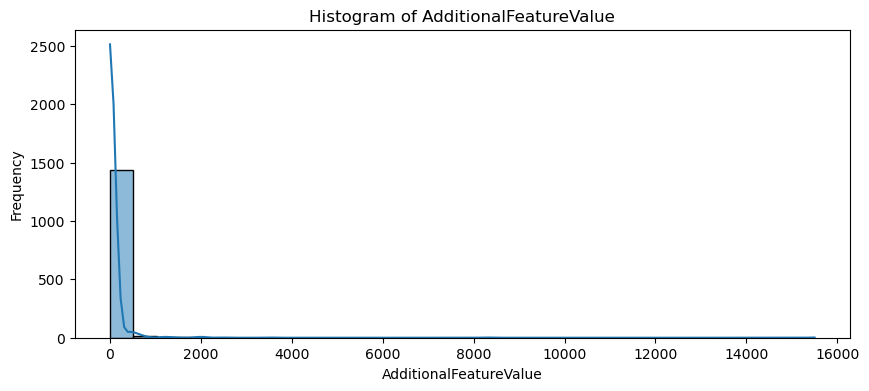

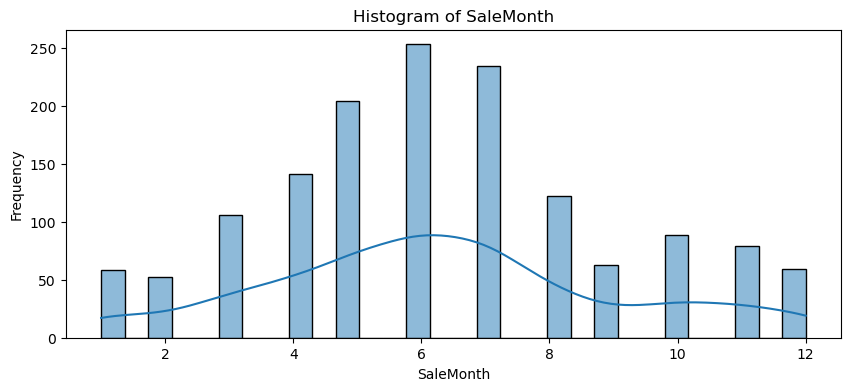

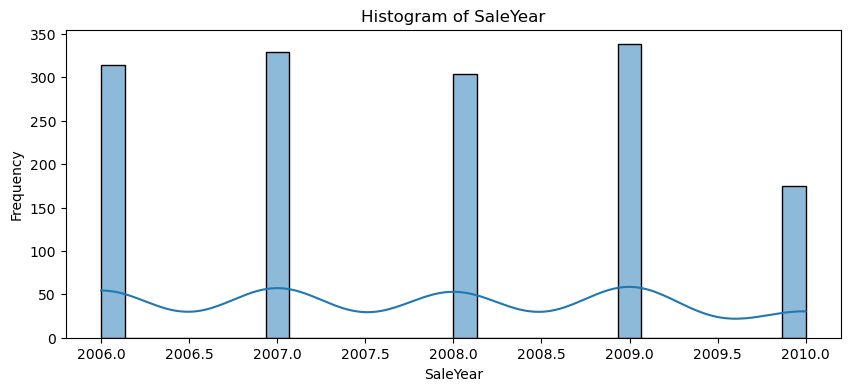

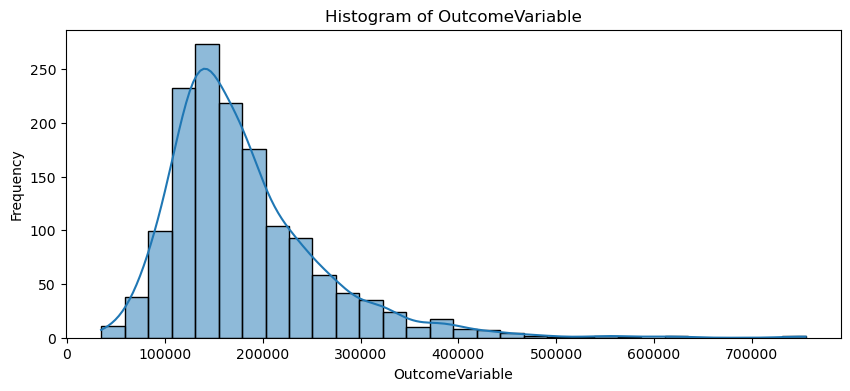

In [41]:
def plot_histograms(dataframe, features, bins=30):
    for feature in features:
        plt.figure(figsize=(10, 4))
        sns.histplot(dataframe[feature], bins=bins, kde=True)
        plt.title(f'Histogram of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()
plot_histograms(df, numeric_features)

- Box Plots

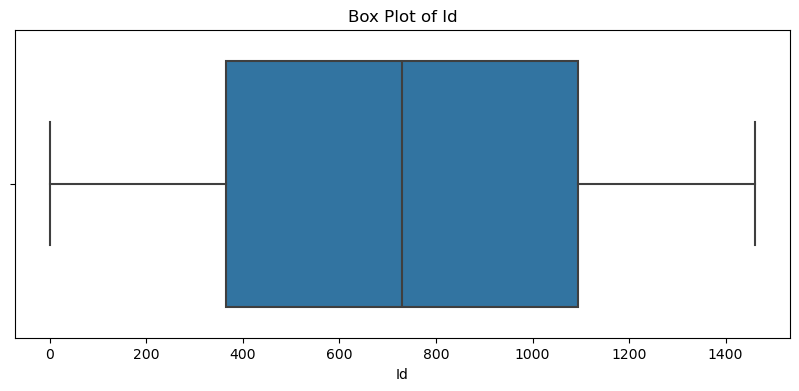

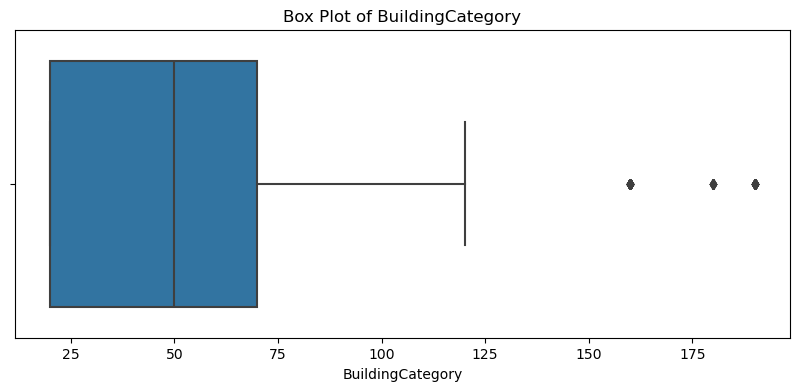

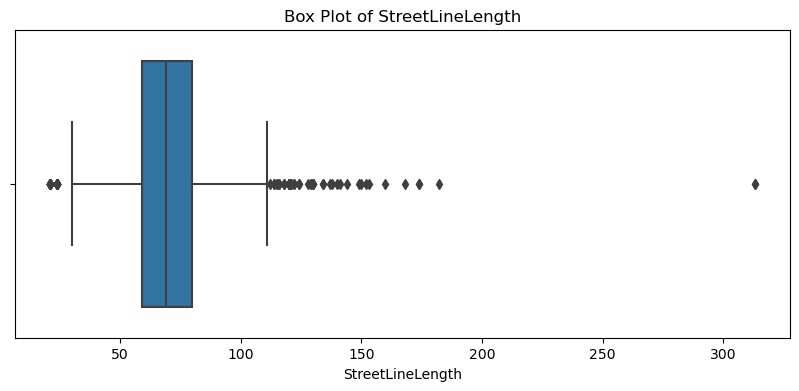

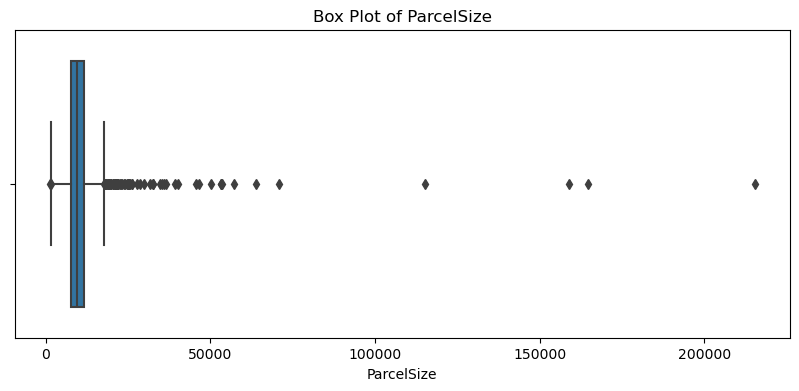

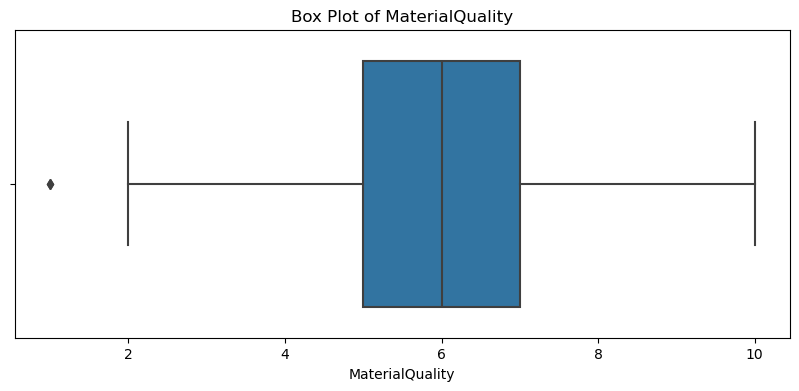

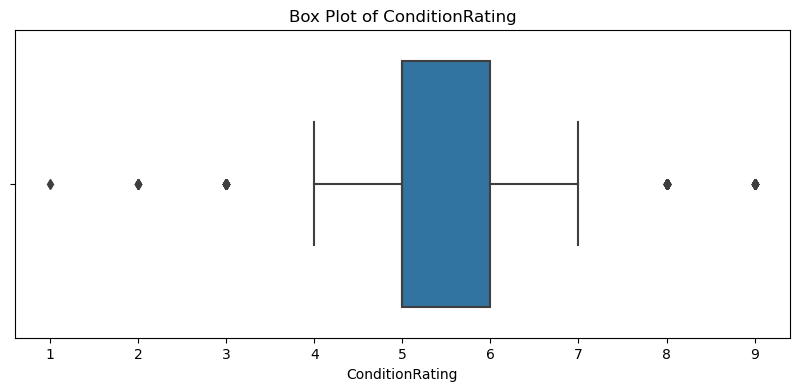

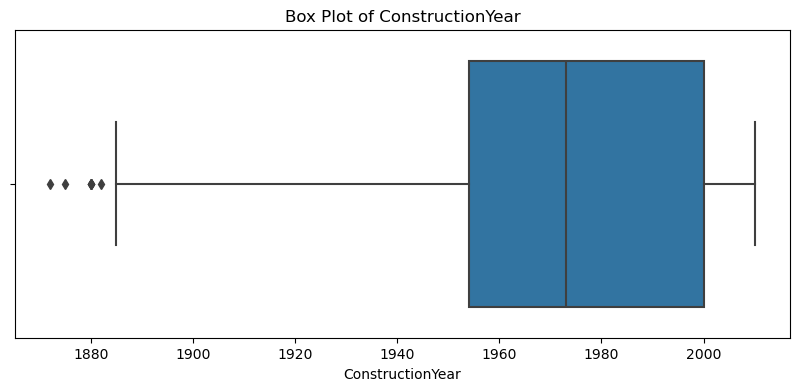

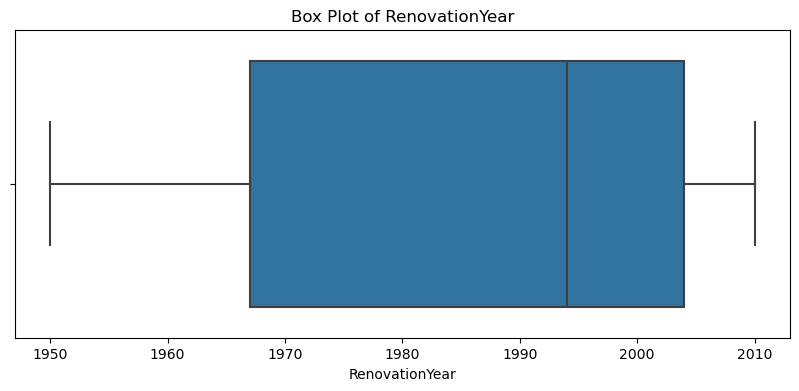

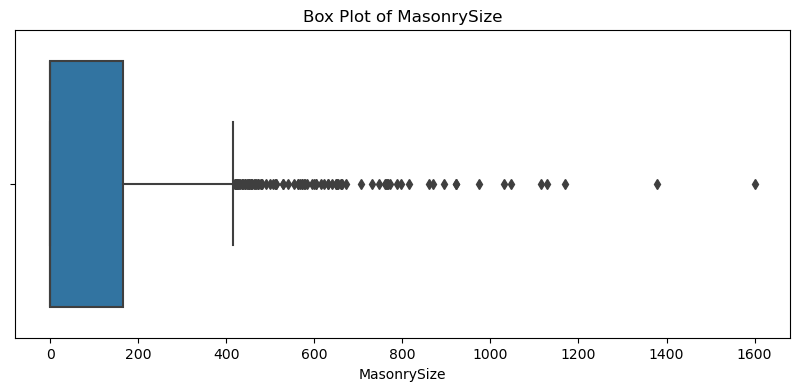

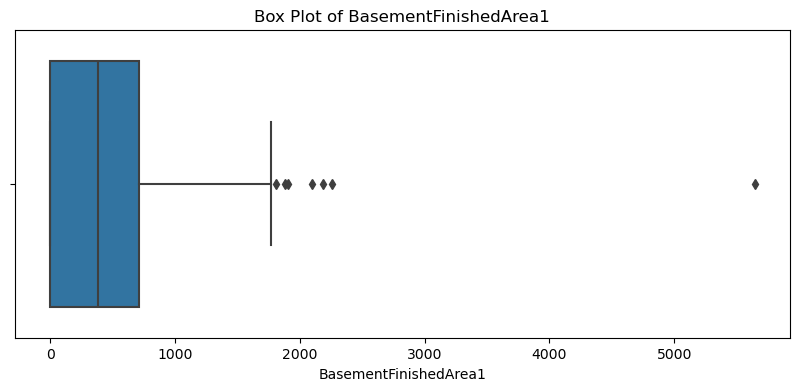

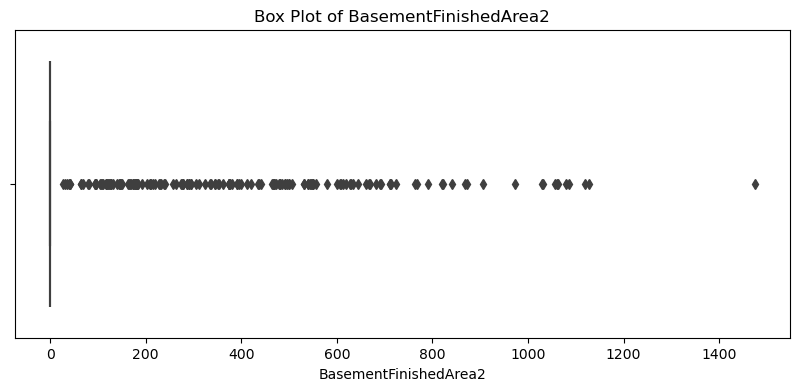

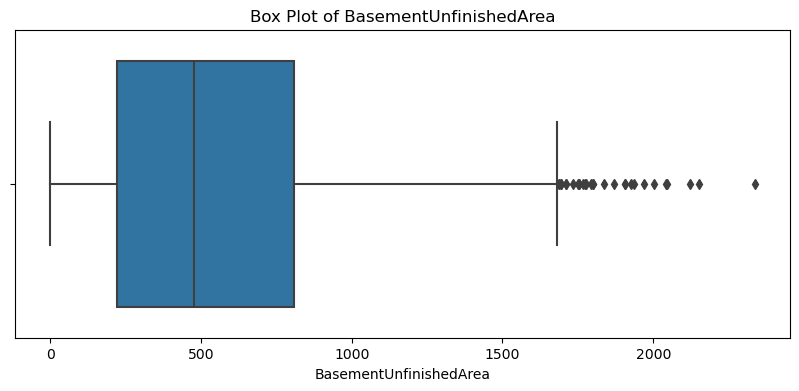

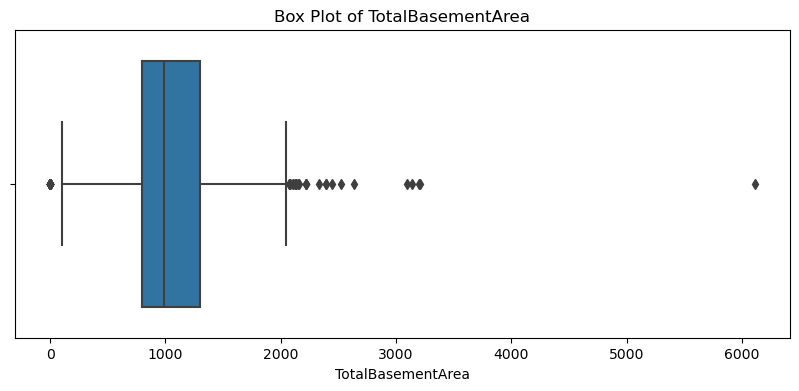

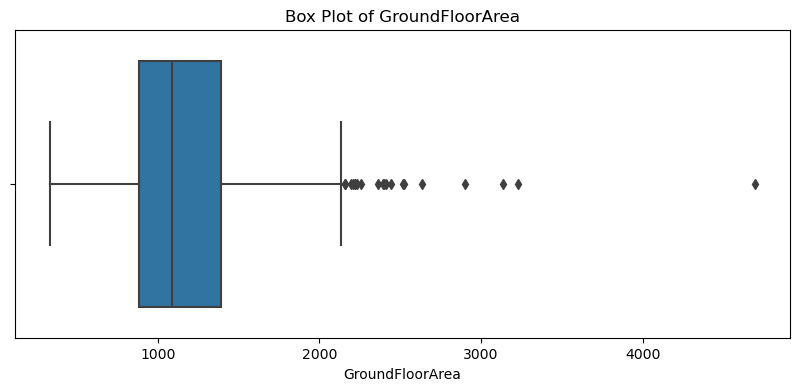

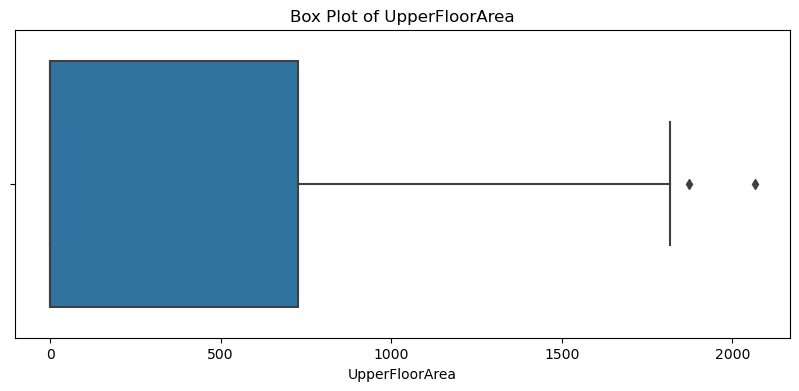

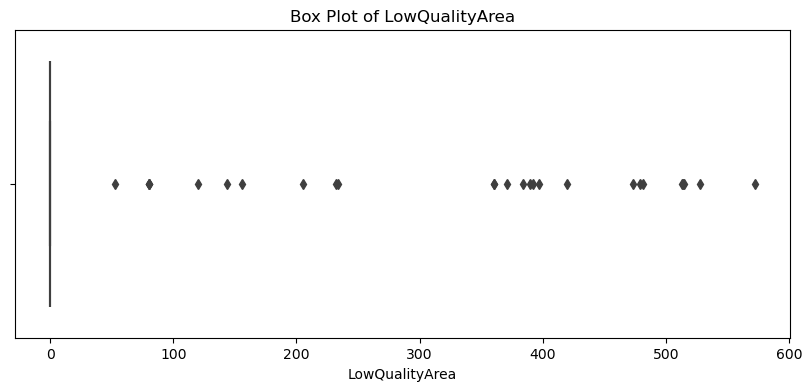

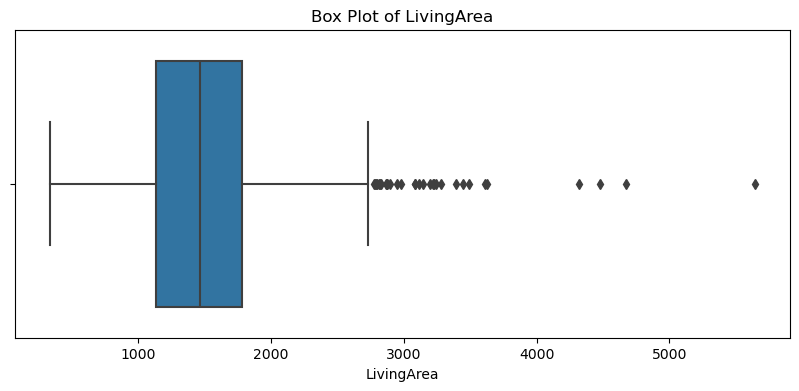

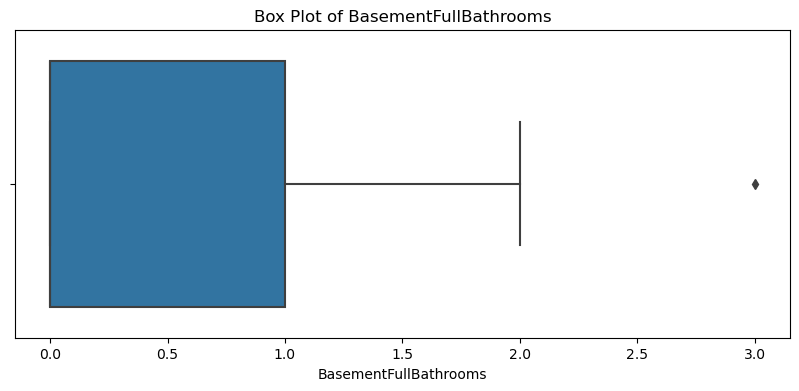

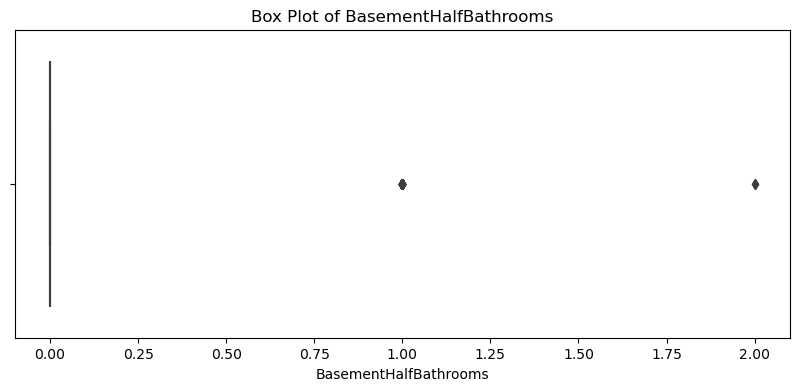

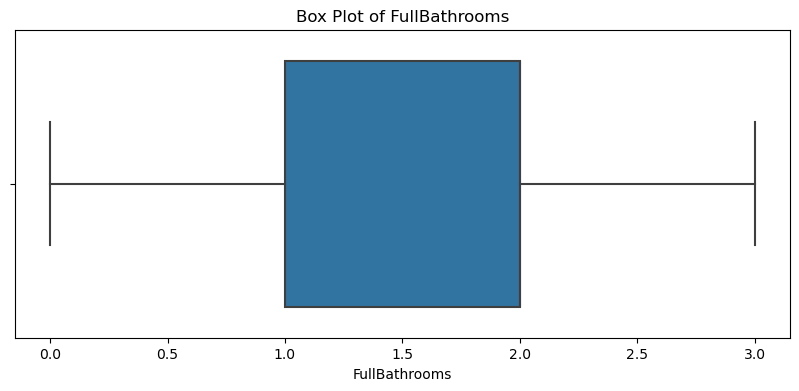

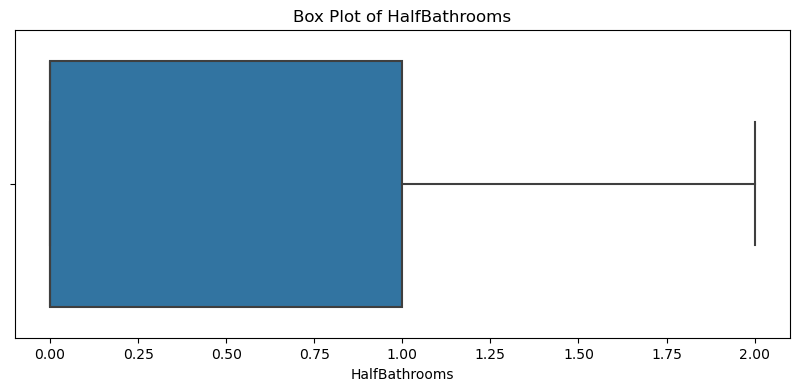

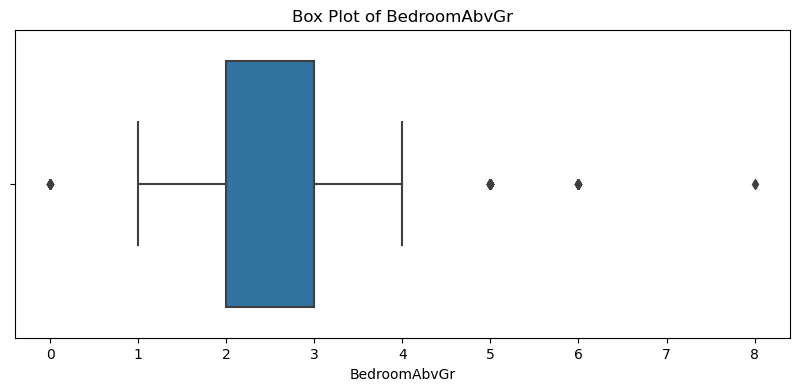

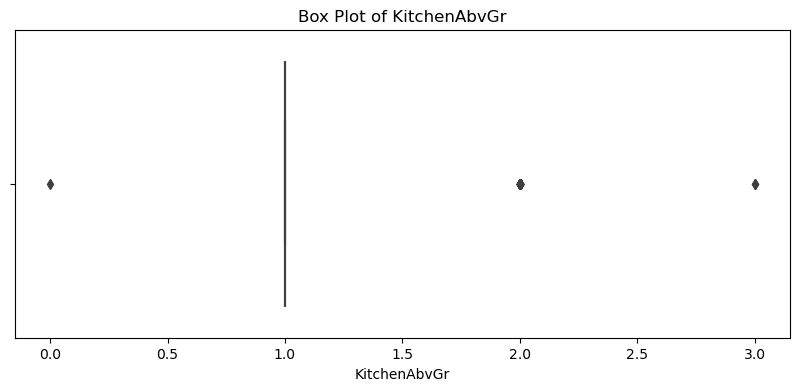

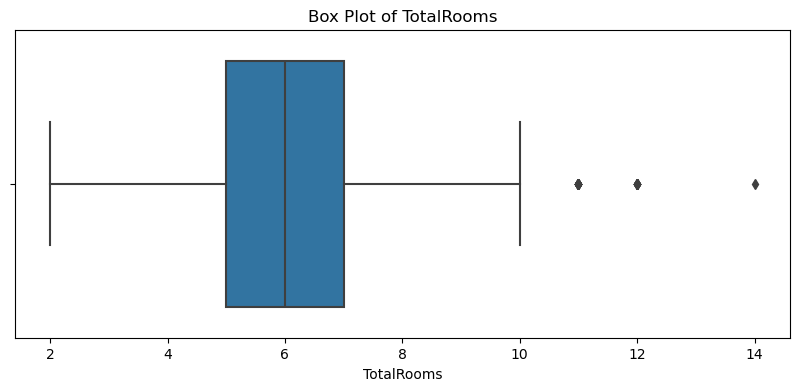

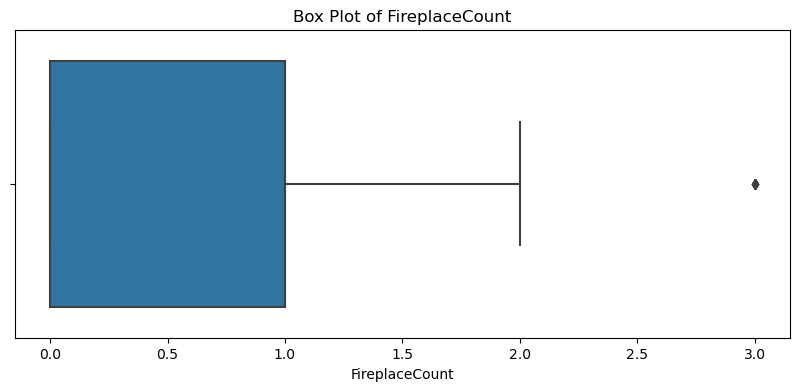

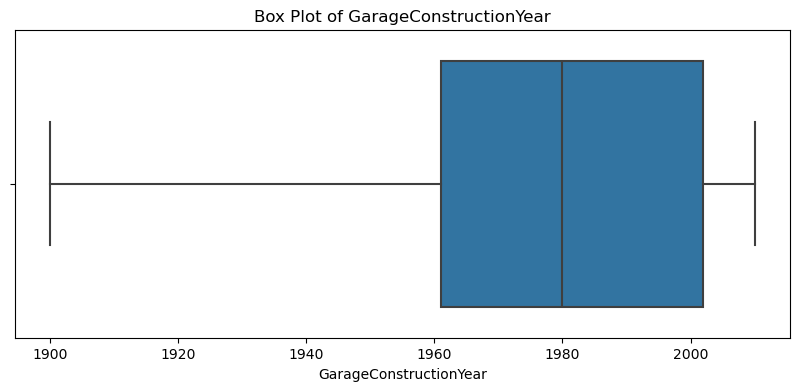

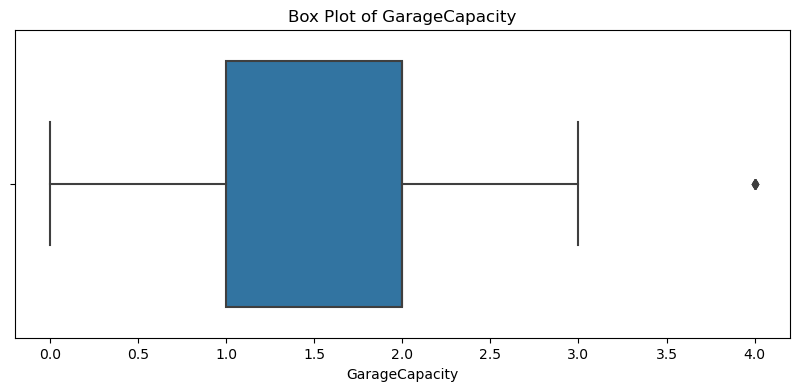

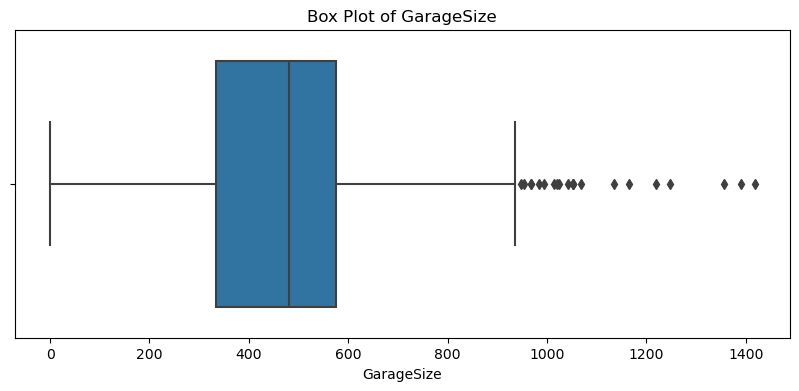

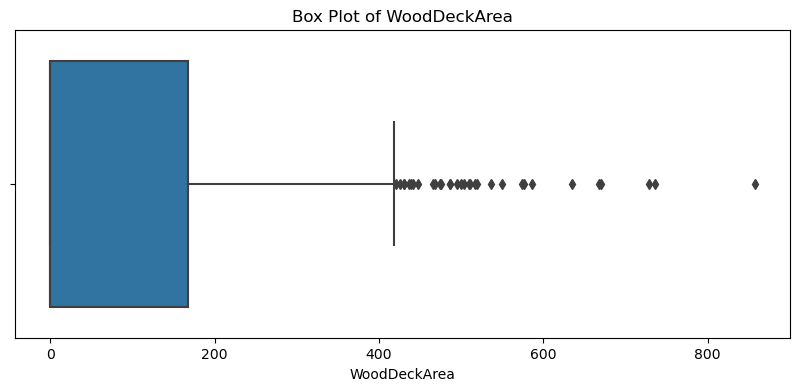

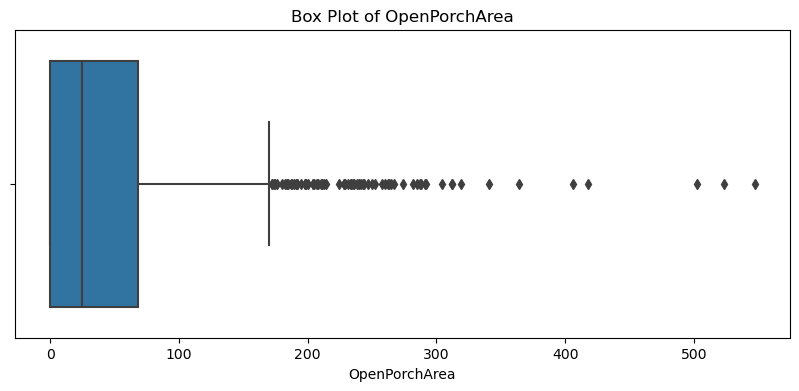

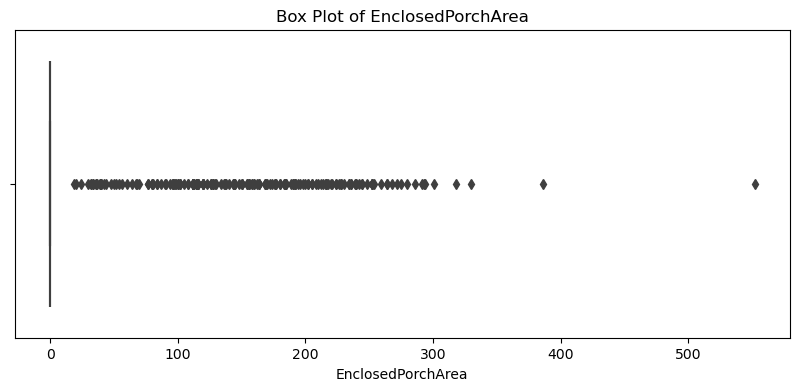

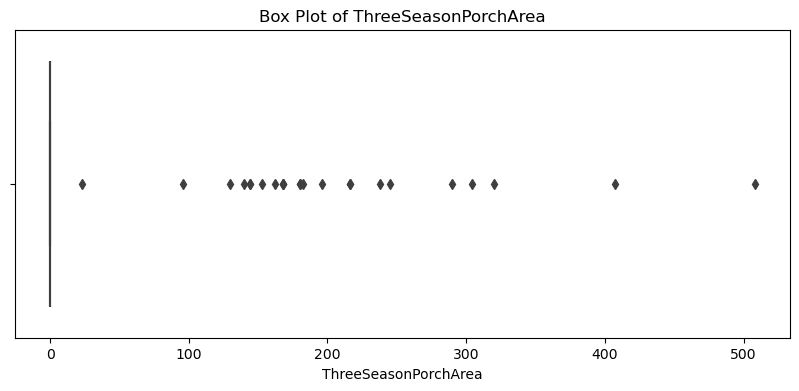

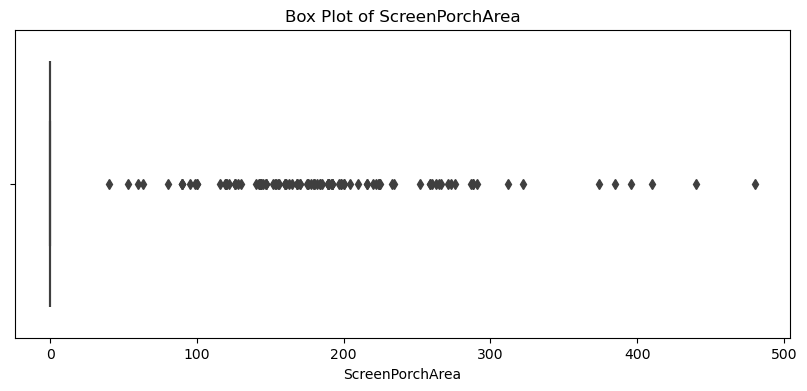

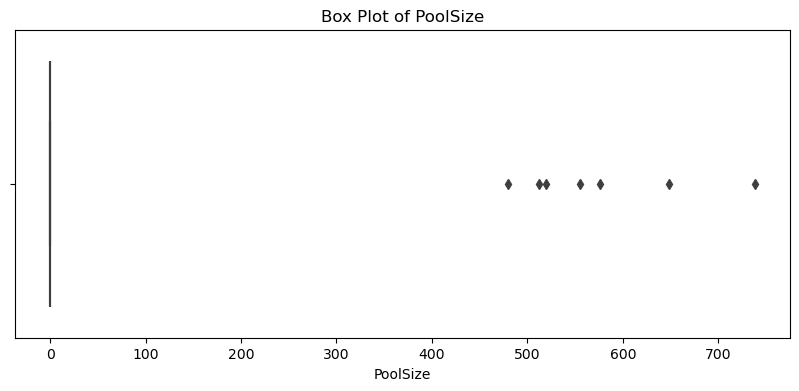

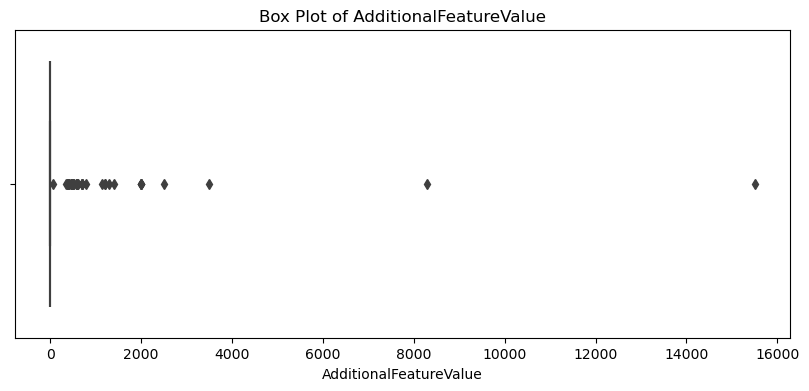

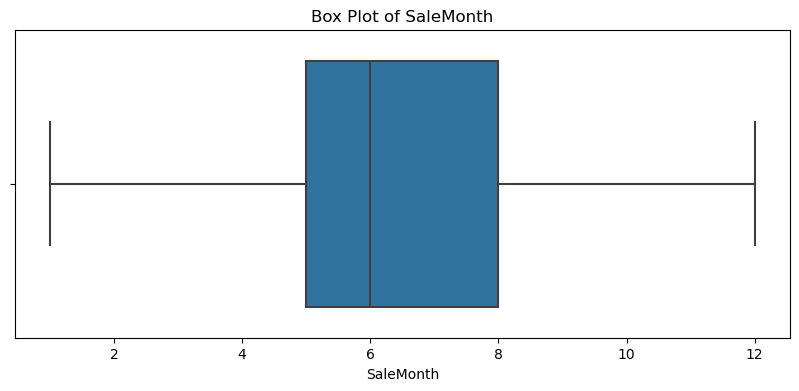

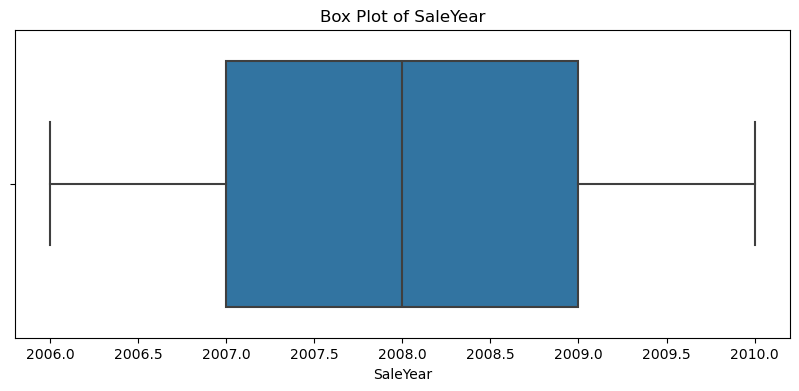

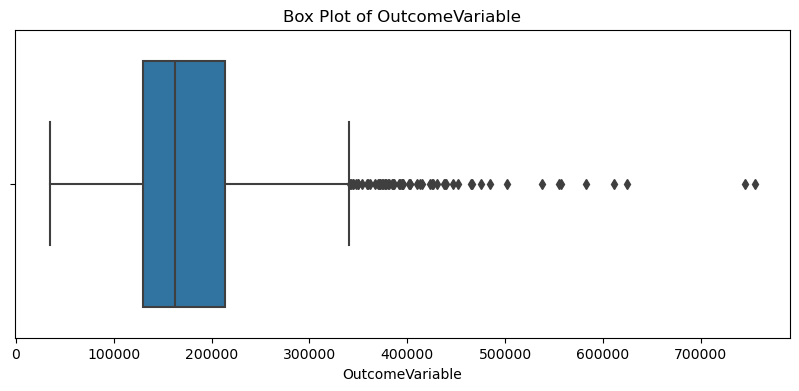

In [42]:
def plot_boxplots(dataframe, features):
    for feature in features:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=dataframe[feature])
        plt.title(f'Box Plot of {feature}')
        plt.xlabel(feature)
        plt.show()
plot_boxplots(df, numeric_features)


# **تقسم الداتا**

حذف تارغيت وال ID

In [43]:
X = df_clean.drop(["OutcomeVariable"], axis=1)
y = df_clean["OutcomeVariable"]

## تنظيف داتا واختيار فيتشرز 

- جلب اعمدة كاتيكورال ورقمية

In [44]:
from sklearn.impute import SimpleImputer
numeric_col=X.select_dtypes(include=['int64','float64']).columns.tolist()
categoric_col=X.select_dtypes(include=['object']).columns.tolist()


-  نعبي قيم نيوميركال بالوسيط

In [45]:
imputer = SimpleImputer(strategy='median')
X[numeric_col] = imputer.fit_transform(X[numeric_col])

- نعبي اعمدة كاتيكورال بالقيمة اكثر شيوعا

In [46]:
imputer = SimpleImputer(strategy='most_frequent')
X[categoric_col] = imputer.fit_transform(X[categoric_col])

- فحص مرة اخرى اذا يوجد هناك قيم فاضية 

In [47]:
print("Missing Values by Column")
print("-"*30)
print(X.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",X.isna().sum().sort_values(ascending=False))

Missing Values by Column
------------------------------
Id                        0
BuildingCategory          0
ZoningClassification      0
StreetLineLength          0
ParcelSize                0
                         ..
AdditionalFeatureValue    0
SaleMonth                 0
SaleYear                  0
SaleType                  0
SaleCondition             0
Length: 74, dtype: int64
------------------------------
TOTAL MISSING VALUES: Id                     0
GarageLocation         0
FunctionalityRating    0
TotalRooms             0
KitchenQuality         0
                      ..
MasonrySize            0
ExteriorCladding2      0
ExteriorCladding1      0
RoofMaterial           0
SaleCondition          0
Length: 74, dtype: int64


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">One-Hot Encoding</h1>

تحويل اعمدة كاتيكروال للارقام لكي تكون مناسبة للتدريب

In [48]:
X = pd.get_dummies(X, columns=categoric_col)

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Standardizing the Data</h1>

توحيد مجال كل قيم اعمدة رقمية لتسهيل عملية تدريب المودل 

<center><img width="300px" src="https://www.thoughtco.com/thmb/gItmqGd5HlnhyPIiLm1YHXOlTnw=/330x242/filters:fill(auto,1)/zscore-56a8fa785f9b58b7d0f6e87b.GIF"></center>

In [49]:
scaler = StandardScaler()
X[numeric_col] = scaler.fit_transform(X[numeric_col])

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Train-Test Split</h1>

تقسم الداتا للتربين والتيست

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

انشاء تابع تقييم مودل لكي نقارن نتائج جميع موديلات واختيار افضل نتيجة

In [51]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse


def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

# المودل 

In [52]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Linear Regression</h2>

In [53]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 270681249573.19006
MSE: 1.6177429510435586e+25
RMSE: 4022117540604.1514
R2 Score: -2109092765217372.8
------------------------------
RMSE Cross-Validation: 634876817985541.5


<Axes: xlabel='true', ylabel='pred'>

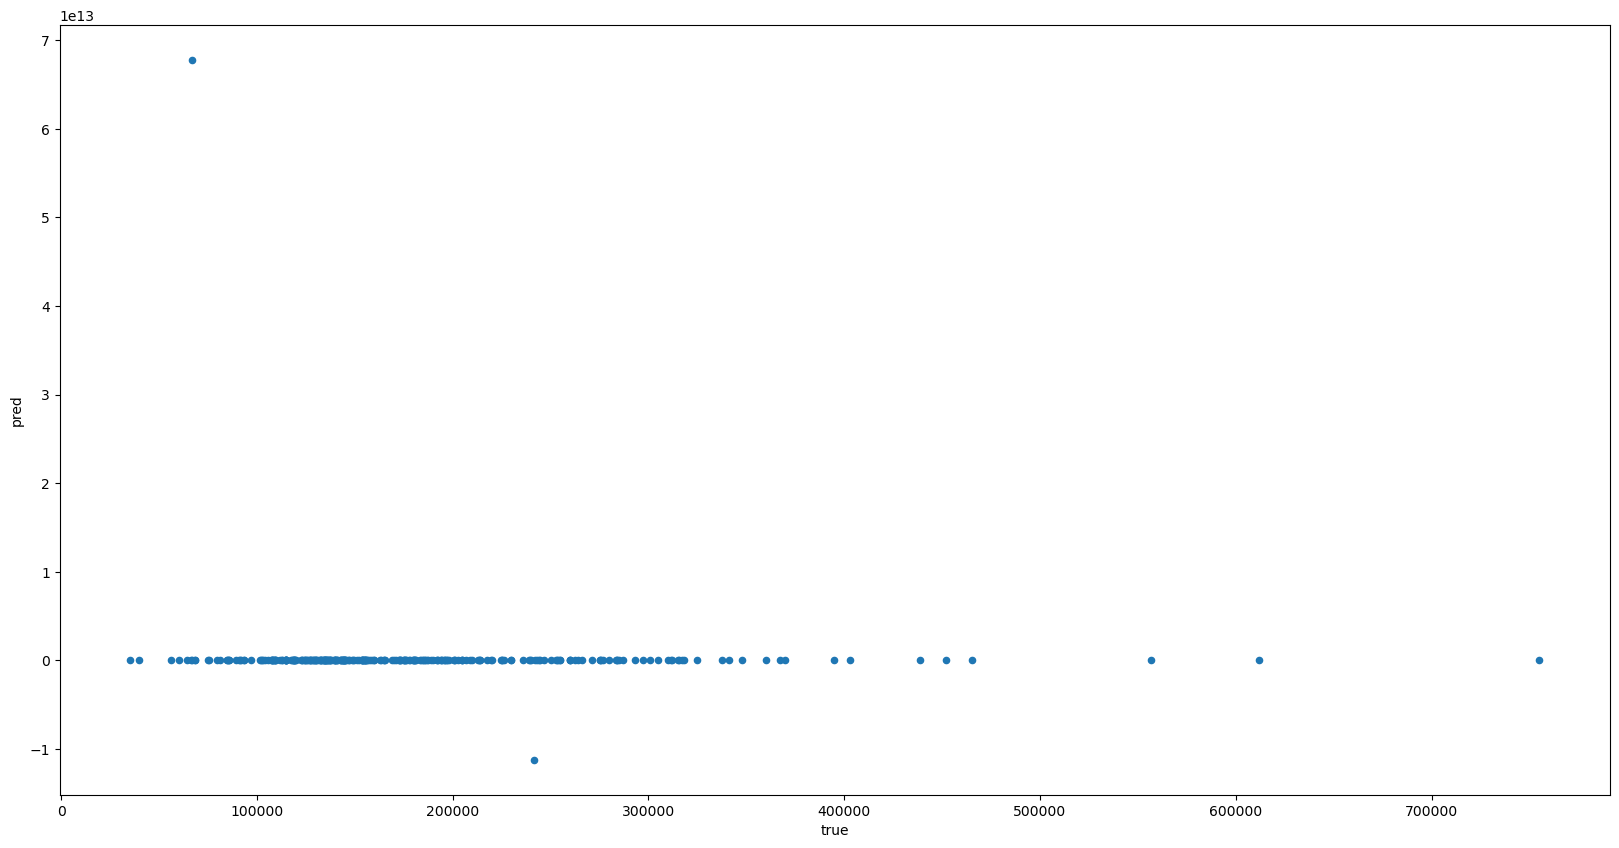

In [54]:
data = {'true': y_test, 'pred': predictions}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Ridge Regression</h2>

In [55]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 18878.739982779207
MSE: 853476712.1955787
RMSE: 29214.32375044096
R2 Score: 0.8887300632147994
------------------------------
RMSE Cross-Validation: 31674.38351274758


<Axes: xlabel='true', ylabel='pred'>

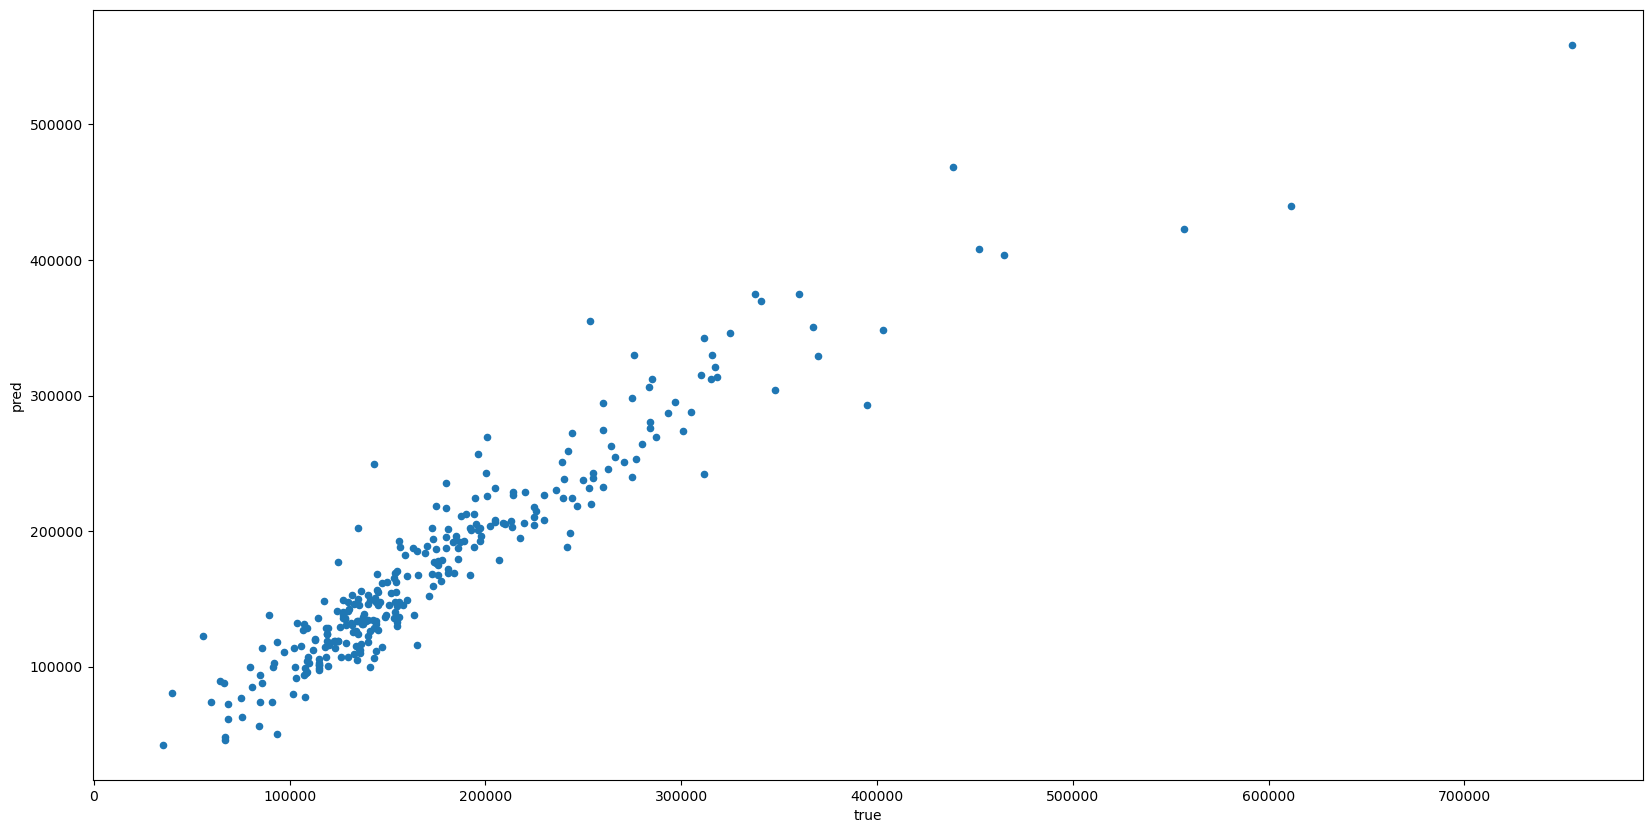

In [56]:
data = {'true': y_test, 'pred': predictions}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Lasso Regression</h2>

In [57]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 17967.432843228617
MSE: 800168530.9330591
RMSE: 28287.250324714474
R2 Score: 0.8956799868324637
------------------------------
RMSE Cross-Validation: 33101.15585801052


<Axes: xlabel='true', ylabel='pred'>

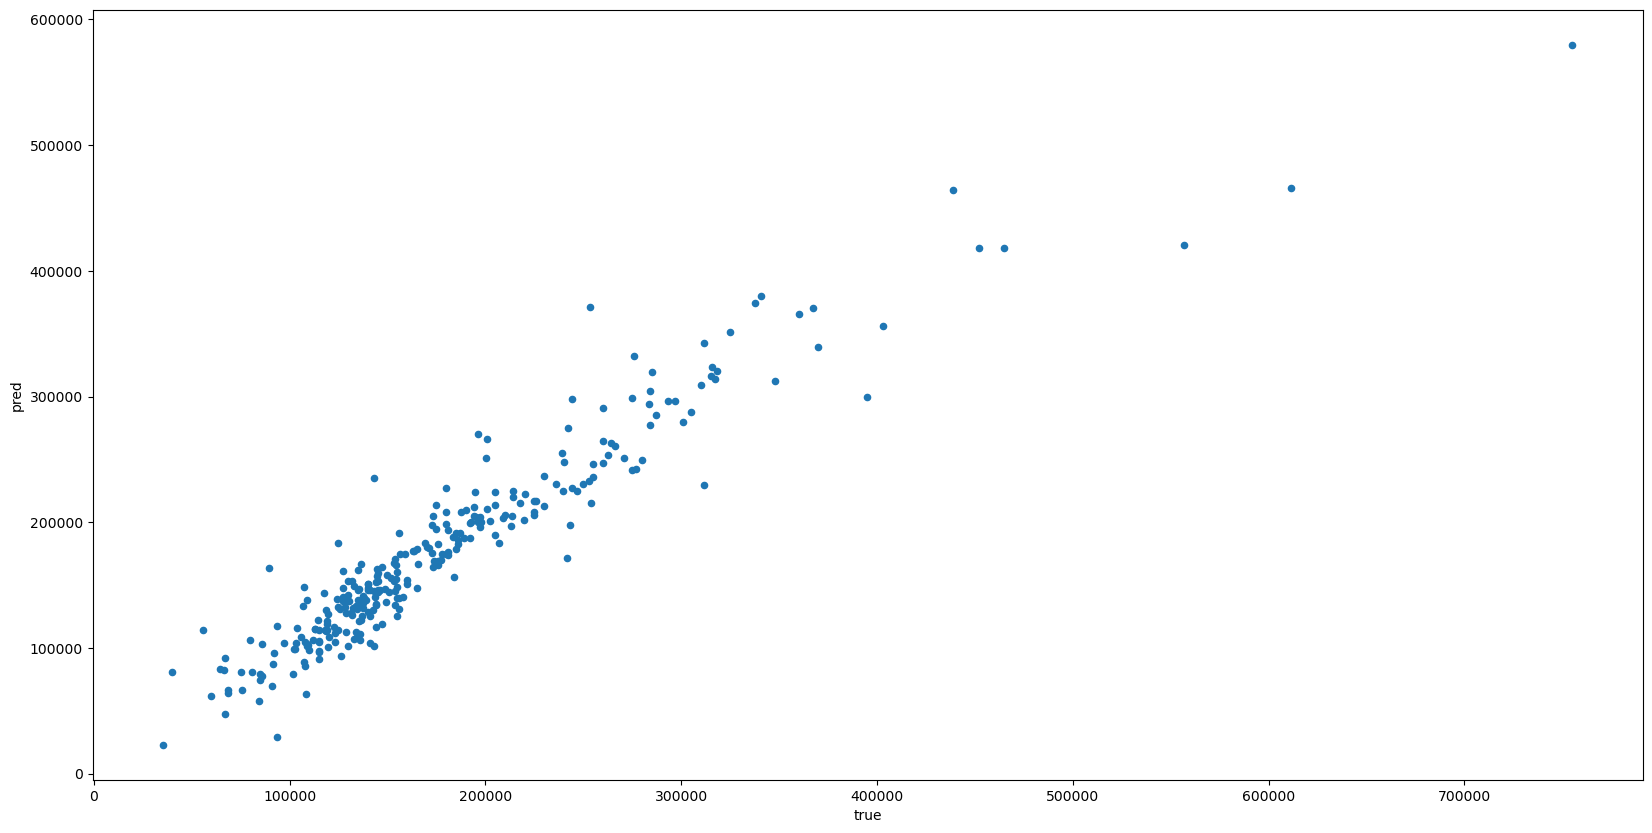

In [58]:
data = {'true': y_test, 'pred': predictions}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Elastic Net</h2>

In [59]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 20216.102659597393
MSE: 1324536676.2870033
RMSE: 36394.18464929532
R2 Score: 0.8273167736926355
------------------------------
RMSE Cross-Validation: 33903.530325905056


<Axes: xlabel='true', ylabel='pred'>

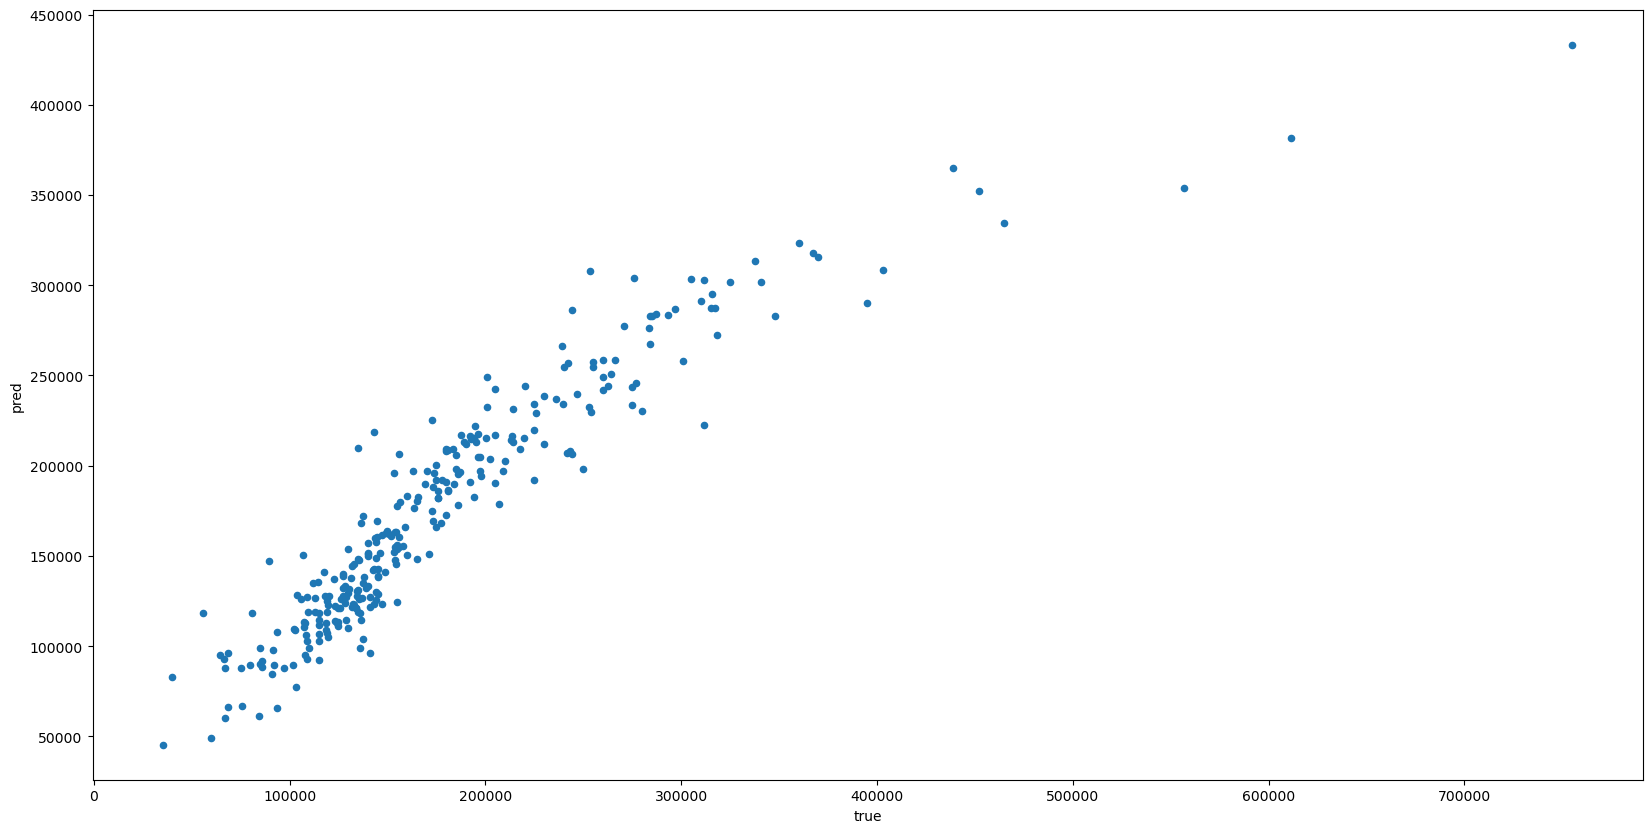

In [60]:
data = {'true': y_test, 'pred': predictions}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Support Vector Machines</h2>

In [61]:
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 17086.025101070416
MSE: 1165132789.538384
RMSE: 34134.04150607402
R2 Score: 0.8480986651589015
------------------------------
RMSE Cross-Validation: 30809.374240992103


<Axes: xlabel='true', ylabel='pred'>

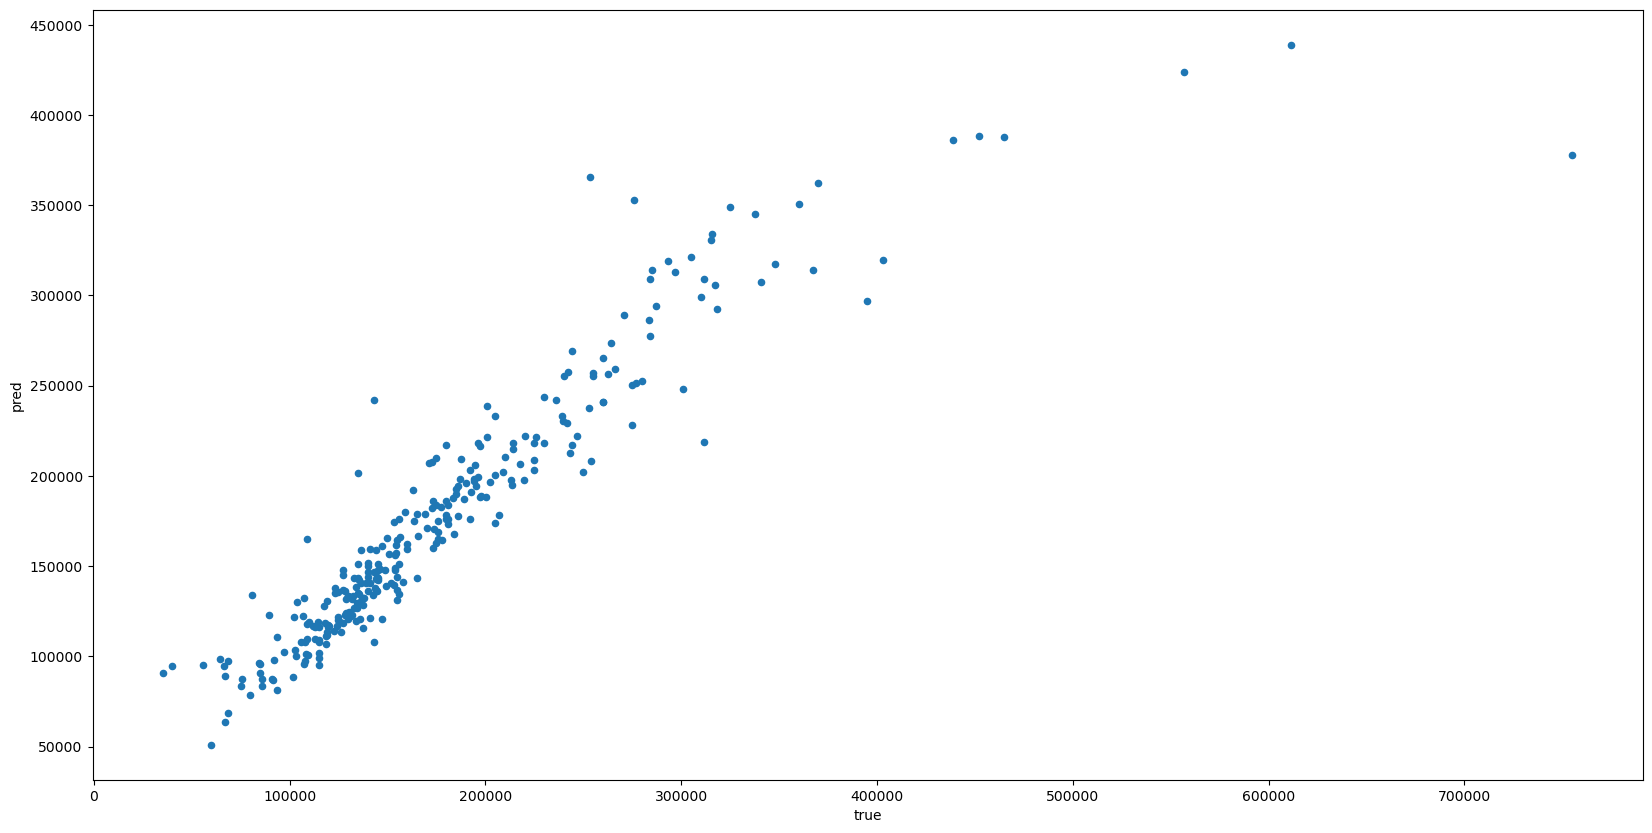

In [62]:
data = {'true': y_test, 'pred': predictions}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Random Forest Regressor</h2>

In [63]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 17935.757602739726
MSE: 843556054.5152158
RMSE: 29044.03647076652
R2 Score: 0.8900234446711275
------------------------------
RMSE Cross-Validation: 29756.67381798699


<Axes: xlabel='true', ylabel='pred'>

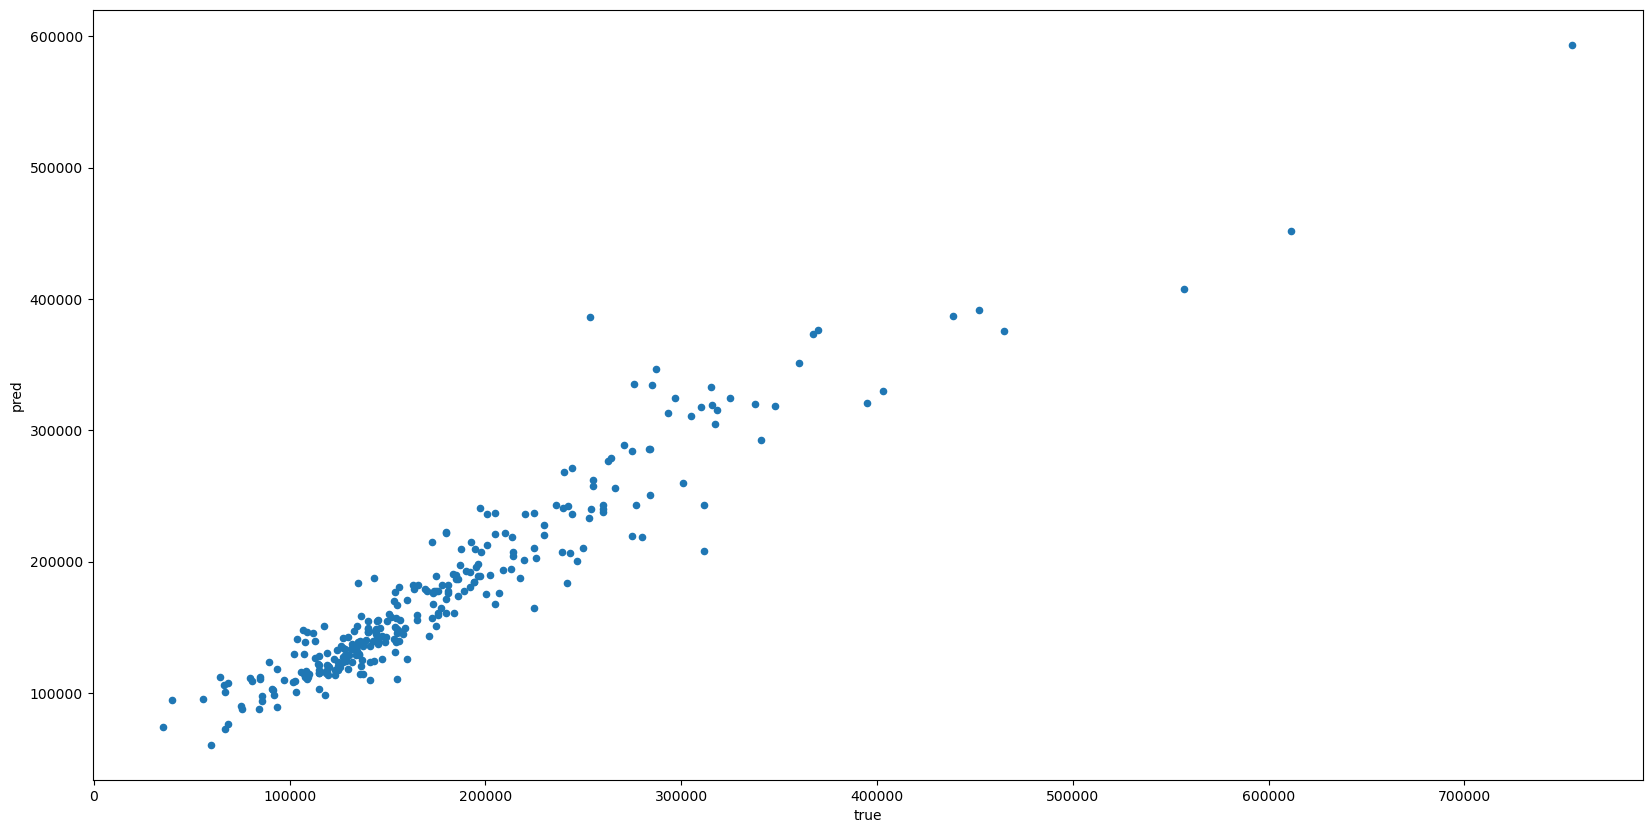

In [64]:
data = {'true': y_test, 'pred': predictions}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">XGBoost Regressor</h2>

In [65]:
xgb = XGBRegressor(learning_rate=0.01,n_estimators=20000,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.006)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 15122.00026755137
MSE: 592821529.2557954
RMSE: 24347.926590488056
R2 Score: 0.9227123445284088
------------------------------
RMSE Cross-Validation: 25076.308828548317


<Axes: xlabel='true', ylabel='pred'>

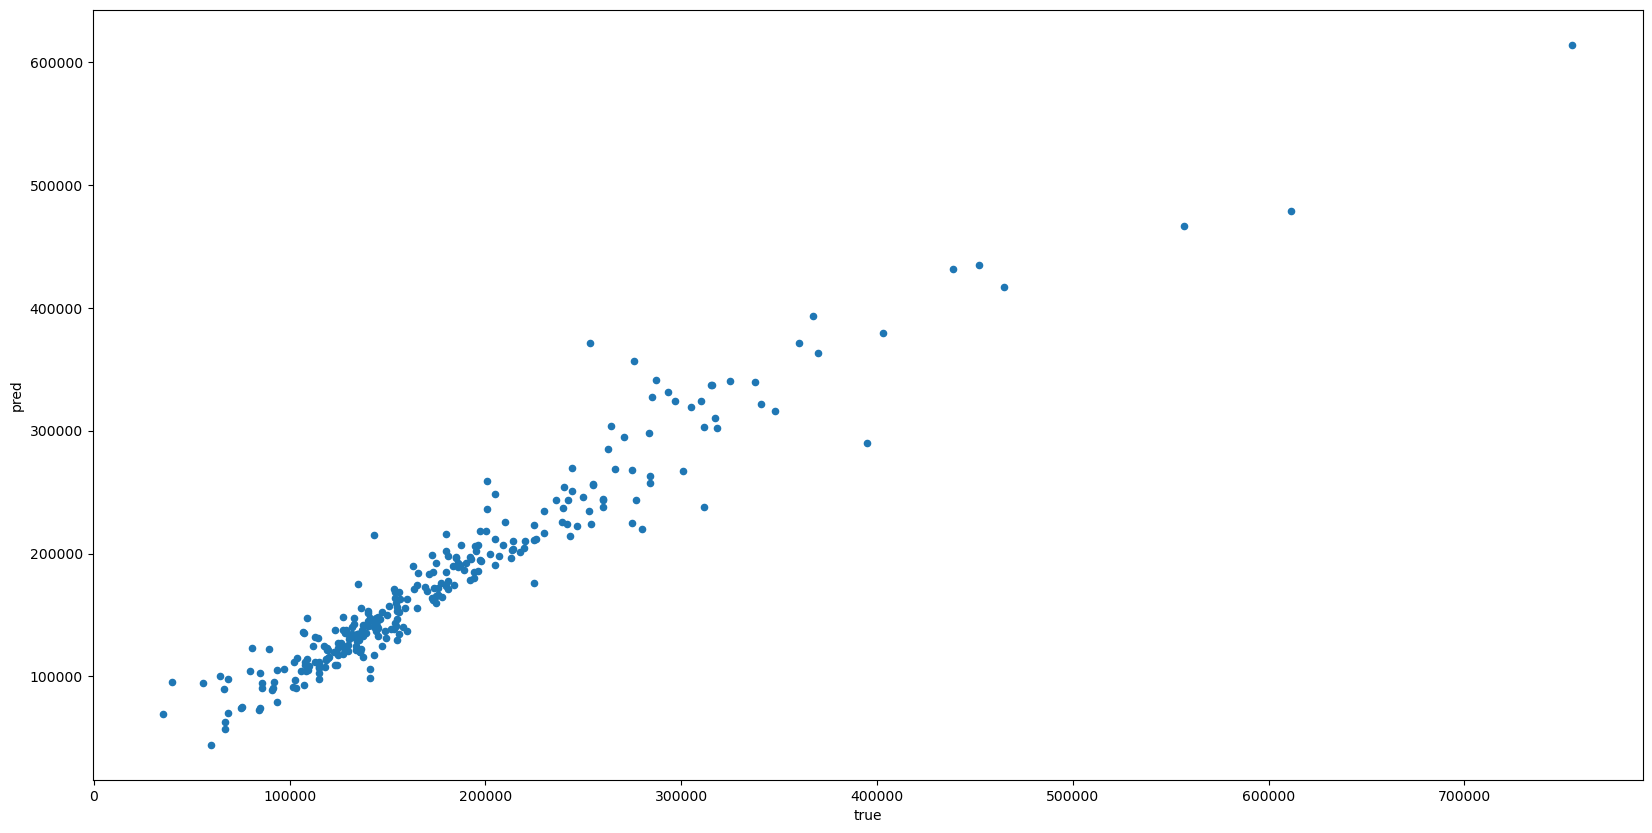

In [66]:
data = {'true': y_test, 'pred': predictions}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Polynomial Regression (Degree=2)</h2>

In [67]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Polynomial Regression (degree=2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 22252.19022753973
MSE: 1122793630.428647
RMSE: 33508.11290461829
R2 Score: 0.8536185293688572
------------------------------
RMSE Cross-Validation: 634876817985541.5


<Axes: xlabel='true', ylabel='pred'>

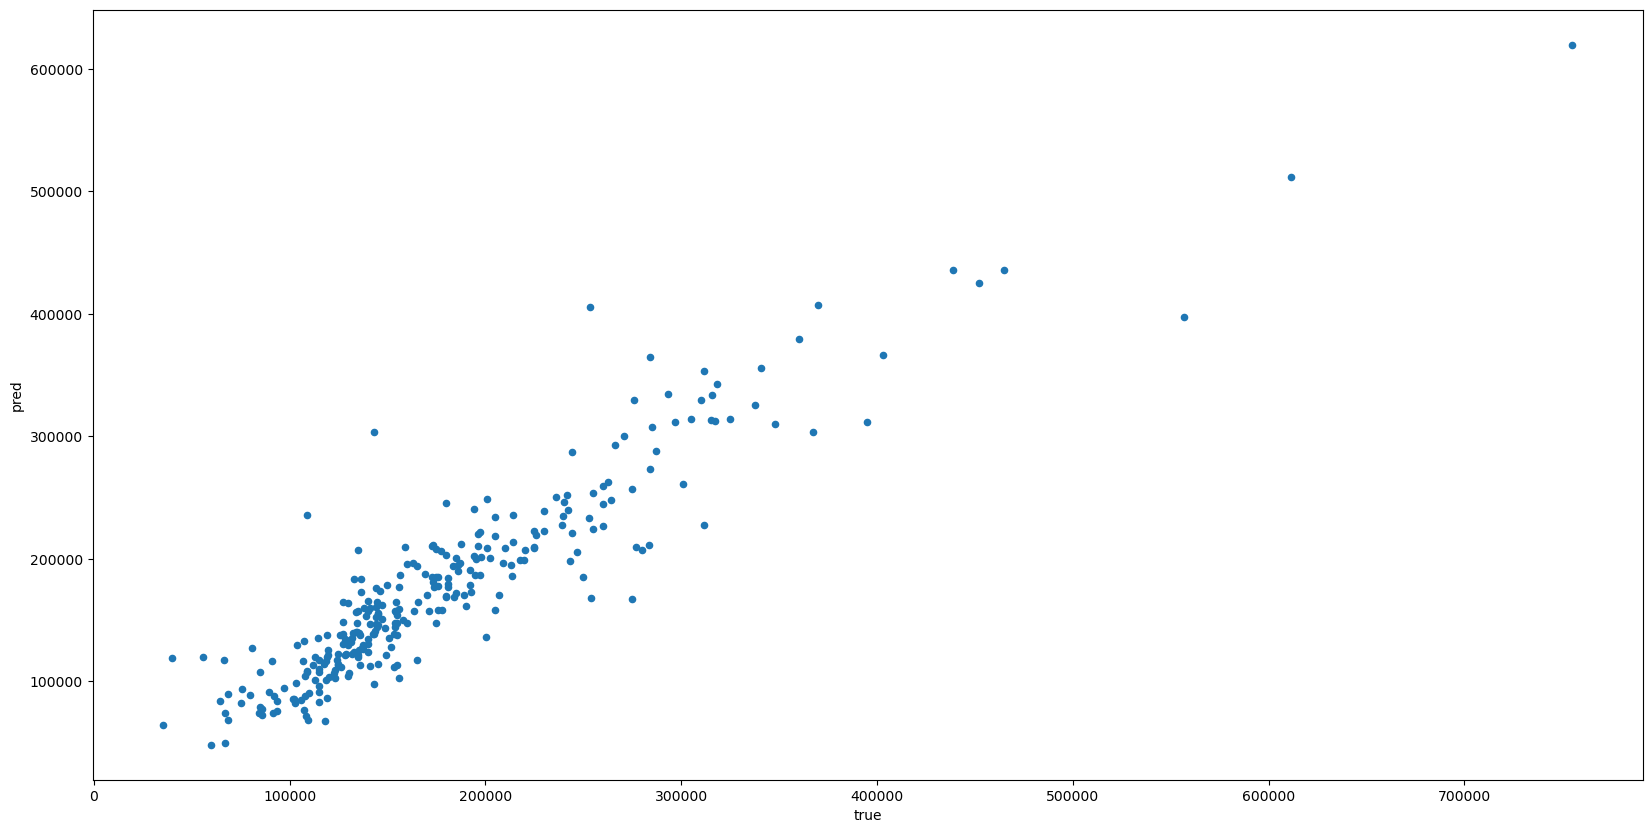

In [68]:
data = {'true': y_test, 'pred': predictions}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Model Comparison</h1>

***The less the Root Mean Squared Error (RMSE), The better the model is.***

In [69]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
6,XGBRegressor,1.512200e+04,5.928215e+08,2.434793e+04,9.227123e-01,2.507631e+04
5,RandomForestRegressor,1.793576e+04,8.435561e+08,2.904404e+04,8.900234e-01,2.975667e+04
4,SVR,1.708603e+04,1.165133e+09,3.413404e+04,8.480987e-01,3.080937e+04
1,Ridge,1.887874e+04,8.534767e+08,2.921432e+04,8.887301e-01,3.167438e+04
2,Lasso,1.796743e+04,8.001685e+08,2.828725e+04,8.956800e-01,3.310116e+04
3,ElasticNet,2.021610e+04,1.324537e+09,3.639418e+04,8.273168e-01,3.390353e+04
0,LinearRegression,2.706812e+11,1.617743e+25,4.022118e+12,-2.109093e+15,6.348768e+14
7,Polynomial Regression (degree=2),2.225219e+04,1.122794e+09,3.350811e+04,8.536185e-01,6.348768e+14


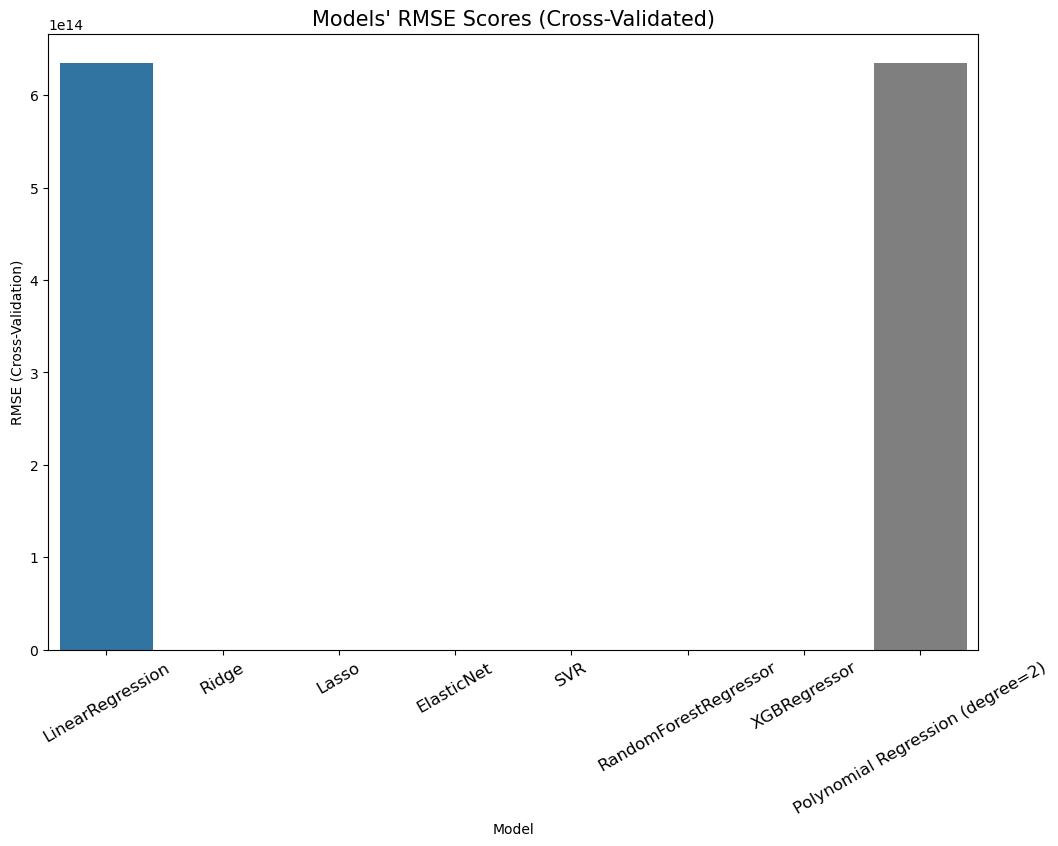

In [70]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

- Make Pipline

## خطوات بايبلاين تدريب النموذج

### 1. التعامل مع القيم المفقودة
- **حساب القيم المفقودة:** حساب مجموع ونسبة القيم المفقودة لكل عامود.
- **إزالة الأعمدة:** إزالة الأعمدة التي تحتوي على 500 قيمة مفقودة أو أكثر.

### 2. تحضير البيانات للنموذج
- **فصل البيانات:** تقسيم البيانات إلى متغيرات مستقلة `X_train` ومتغير الهدف `Y_train`.

### 3. تحديد نوع البيانات
- **تصنيف الأعمدة:** تصنيف الأعمدة إلى نوعين، رقمية وفئوية.

### 4. معالجة البيانات الرقمية
- **ملء القيم المفقودة:** استخدام الإمبيوتر لملء القيم المفقودة بالقيمة الوسيطة.
- **تحويل البولينوميال:** تطبيق تحويل Polynomial لإنشاء ميزات جديدة.
- **تقييس البيانات:** تقييس البيانات لتكون بمقياس موحد.

### 5. معالجة البيانات الفئوية
- **ملء القيم المفقودة:** استخدام الإمبيوتر لملء القيم المفقودة بالقيمة الأكثر تكراراً.
- **تحويل الفئات إلى أرقام:** استخدام `TargetEncoder` لتحويل البيانات الفئوية.

### 6. تجميع المعالجات في محول عمودي
- **تجميع المعالجات:** نجمع معالجات البيانات الرقمية والفئوية في محول عمودي.

### 7. تكوين البايبلاين النهائي
- **بناء البايبلاين:** تجميع المحول العمودي مع النموذج في بايبلاين واحد.
- **استخدام `XGBRegressor`:** تهيئة `XGBRegressor` بإعدادات محددة.

### 8. تدريب النموذج
- **تدريب البايبلاين:** استخدام البايبلاين لتدريب النموذج على البيانات.

### 9. حفظ النموذج
- **حفظ البايبلاين:** حفظ النموذج المدرب في ملف باستخدام `pickle` لاستخدامه لاحقاً.


In [96]:
import pickle
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from sklearn.decomposition import PCA

def pipline_model(train):
    total = train.isnull().sum().sort_values(ascending=False)
    percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    columns = missing_data[missing_data['Total'] >= 500]
    train = train.drop(columns=columns.index)

    Y_train = train["OutcomeVariable"]
    X_train = train.drop(["Id", "OutcomeVariable"], axis=1)

    numeric_col = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categoric_col = X_train.select_dtypes(include=['object']).columns.tolist()

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('scaler', StandardScaler()),
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('TargetEncoder', TargetEncoder())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_col),
            ('cat', categorical_transformer, categoric_col)
        ])

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', XGBRegressor(
            learning_rate=0.01,
            n_estimators=20000,
            max_depth=3,
            min_child_weight=0,
            gamma=0,
            subsample=0.7,
            colsample_bytree=0.7,
            objective='reg:linear',
            nthread=-1,
            scale_pos_weight=1,
            seed=27,
            reg_alpha=0.006
        ))
    ])

    pipeline.fit(X_train, Y_train)
    with open('20.pkl', 'wb') as file:
         pickle.dump(pipeline, file)

In [97]:
from joblib import load
df =  pd.read_csv("train_colleage.csv")
pipline_model(df)

- تحميل بيانات الاختبار وعمل بريدكت 

In [98]:
df_test=pd.read_csv('test.csv')
loaded_model = load('20.pkl')
new_predictions = loaded_model.predict(df_test)
print(new_predictions)

[123523.9  156694.14 180051.55 ... 173478.33 115632.68 214890.88]


- حفظ نتائح

In [95]:
submission = pd.DataFrame({
    'Id': df_test['Id'].values,  
    'SalePrice': new_predictions
})
submission.to_csv('20.csv', index=False)

# عمل غريد سيرج

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import pandas as pd
import numpy as np

models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'XGBRegressor': XGBRegressor()
}

param_grids = {
    'Linear Regression': {
        'model__fit_intercept': [True, False]
    },
    'Ridge': {
        'model__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
    },
    'Lasso': {
        'model__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
    },
    'Decision Tree Regressor': {
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_leaf': [1, 2, 4],
        'model__min_samples_split': [2, 5, 10],
        'model__max_features': ['auto', 'sqrt', 'log2']
    },
    'Random Forest Regressor': {
        'model__n_estimators': [100, 200, 300, 500],
        'model__max_features': ['auto', 'sqrt', 'log2'],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting Regressor': {
        'model__n_estimators': [100, 200, 300],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 7],
        'model__subsample': [0.5, 0.75, 1.0],
        'model__max_features': ['auto', 'sqrt', 'log2']
    },
    'XGBRegressor': {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [3, 5, 7],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__min_child_weight': [1, 3, 6],
        'model__subsample': [0.5, 0.75, 1.0],
        'model__colsample_bytree': [0.5, 0.75, 1.0]
    }
}

def grid_search(train):
    total = train.isnull().sum().sort_values(ascending=False)
    percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    columns = missing_data[missing_data['Total'] >= 500]
    train = train.drop(columns=columns.index)

    Y_train = train["OutcomeVariable"]
    X_train = train.drop(["Id", "OutcomeVariable"], axis=1)

    numeric_col = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categoric_col = X_train.select_dtypes(include=['object']).columns.tolist()

    numeric_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),  
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_col),
        ('cat', categorical_transformer, categoric_col)
    ])

    model = XGBRegressor(
        learning_rate=0.01,
        n_estimators=20000,
        max_depth=3,
        min_child_weight=0,
        gamma=0,
        subsample=0.7,
        colsample_bytree=0.7,
        objective='reg:linear',
        nthread=-1,
        scale_pos_weight=1,
        seed=27,
        reg_alpha=0.006
    )

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    grid_search = GridSearchCV(pipeline, param_grid=param_grids, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
    grid_search.fit(X_train, Y_train)
    
    return grid_search.best_params_, grid_search.best_score_

